# STL monitoring over interval functions

In [1]:
from functools import partial, reduce

## Interval newton

In [2]:
load('interval_utils.py')

### Interval operations

In [3]:
interval([1,2,5]).str(style='brackets')


'[1.0000000000000000 .. 5.0000000000000000]'

In [4]:
RIF(-1,2).intersection(RIF(1,3)).str(style='brackets')

'[1.0000000000000000 .. 2.0000000000000000]'

In [5]:
isub(RIF(0,2), RIF(-1,1)).str(style='brackets')

'[1.0000000000000000 .. 2.0000000000000000]'

In [6]:
isub(RIF(0,2), RIF(0.5,1.5)).str(style='brackets')

'[0.00000000000000000 .. 2.0000000000000000]'

In [7]:
isub(RIF(0,2), RIF(1,2)).str(style='brackets')

'[0.00000000000000000 .. 1.0000000000000000]'

In [8]:
extdiv(RIF(3,4), RIF(1,2), RIF(1,5)).str(style='brackets')

b = 2.?


'[1.5000000000000000 .. 4.0000000000000000]'

In [9]:
extdiv(RIF(3,4), RIF(0,2), RIF(1,5)).str(style='brackets')

b = 1.?


'[1.0000000000000000 .. 1.5000000000000000]'

In [10]:
RIF(1,2).center()

1.50000000000000

In [11]:
def newton(f, fprime, x0, n):
    x = RIF(x0)
    for i in range(n):
        xc = RIF(x.center())
#         x = (xc - f(xc)/fprime(x)).intersection(x)
        x = xc + extdiv(-f(xc), fprime(x), x - xc)
        print "f({}) = {}".format(i, x.str(style='brackets')
                                  if x.diameter() > 0.1 else x)
    return x

### Example: finding $\sqrt{2}$

In [12]:
f      = lambda x: x**2 - 2
fprime = lambda x: 2*x

In [13]:
sqrt(2.0)

1.41421356237310

In [14]:
newton(f, fprime, RIF(1.4,1.45), 15)

b = 2.8?
f(0) = 1.415?
b = 2.829?
f(1) = 1.41421356?
b = 2.8284272?
f(2) = 1.414213562373095?
b = 2.828427124746190?
f(3) = 1.414213562373095?
b = 2.828427124746190?
f(4) = 1.414213562373095?
b = 2.828427124746190?
f(5) = 1.414213562373095?
b = 2.828427124746190?
f(6) = 1.414213562373095?
b = 2.828427124746190?
f(7) = 1.414213562373095?
b = 2.828427124746190?
f(8) = 1.414213562373095?
b = 2.828427124746190?
f(9) = 1.414213562373095?
b = 2.828427124746190?
f(10) = 1.414213562373095?
b = 2.828427124746190?
f(11) = 1.414213562373095?
b = 2.828427124746190?
f(12) = 1.414213562373095?
b = 2.828427124746190?
f(13) = 1.414213562373095?
b = 2.828427124746190?
f(14) = 1.414213562373095?


1.414213562373095?

### Example: enclosing 0 crossings

In [15]:
def lower(f, I, x):
    return float(RIF(f(x + I)).endpoints()[0])
def upper(f, I, x):
    return float(RIF(f(x + I)).endpoints()[1])

In [16]:
I = RIF(-0.3,0.3)

In [17]:
g = lambda x: sin(x+I)
gprime = lambda x: cos(x+I)

In [18]:
x0 = newton(g, gprime, RIF(-pi/4,pi/4),15)

b = 1.?
f(0) = [-0.63340159272047103 .. 0.63340159272047103]
b = 1.?
f(1) = [-0.49658603143445352 .. 0.49658603143445352]
b = 1.?
f(2) = [-0.42268397111483092 .. 0.42268397111483092]
b = 1.?
f(3) = [-0.39400947238022361 .. 0.39400947238022361]
b = 1.?
f(4) = [-0.38444771270454759 .. 0.38444771270454759]
b = 1.?
f(5) = [-0.38143040832528236 .. 0.38143040832528236]
b = 1.?
f(6) = [-0.38049526589605954 .. 0.38049526589605954]
b = 1.?
f(7) = [-0.38020707230770845 .. 0.38020707230770845]
b = 1.?
f(8) = [-0.38011841133911179 .. 0.38011841133911179]
b = 1.?
f(9) = [-0.38009115000821859 .. 0.38009115000821859]
b = 1.?
f(10) = [-0.38008276912492040 .. 0.38008276912492040]
b = 1.?
f(11) = [-0.38008019274181105 .. 0.38008019274181105]
b = 1.?
f(12) = [-0.38007940074341390 .. 0.38007940074341390]
b = 1.?
f(13) = [-0.38007915727867303 .. 0.38007915727867303]
b = 1.?
f(14) = [-0.38007908243635936 .. 0.38007908243635936]


In [19]:
x1 = newton(g, gprime, RIF(3*pi/4,5*pi/4),15)

b = -1.?
f(0) = [2.5081910608693198 .. 3.7749942463102660]
b = -1.?
f(1) = [2.6450066221553374 .. 3.6381786850242493]
b = -1.?
f(2) = [2.7189086824749604 .. 3.5642766247046259]
b = -1.?
f(3) = [2.7475831812095683 .. 3.5356021259700184]
b = -1.?
f(4) = [2.7571449408852446 .. 3.5260403662943421]
b = -1.?
f(5) = [2.7601622452645098 .. 3.5230230619150765]
b = -1.?
f(6) = [2.7610973876937330 .. 3.5220879194858537]
b = -1.?
f(7) = [2.7613855812820840 .. 3.5217997258975027]
b = -1.?
f(8) = [2.7614742422506806 .. 3.5217110649289061]
b = -1.?
f(9) = [2.7615015035815737 .. 3.5216838035980130]
b = -1.?
f(10) = [2.7615098844648717 .. 3.5216754227147145]
b = -1.?
f(11) = [2.7615124608479812 .. 3.5216728463316054]
b = -1.?
f(12) = [2.7615132528463783 .. 3.5216720543332083]
b = -1.?
f(13) = [2.7615134963111191 .. 3.5216718108684671]
b = -1.?
f(14) = [2.7615135711534328 .. 3.5216717360261534]


In [20]:
x2 = newton(g, gprime, RIF(7*pi/4,9*pi/4),15)

b = 1.?
f(0) = [5.6497837144591107 .. 6.9165868999000609]
b = 1.?
f(1) = [5.7865992757451278 .. 6.7797713386140455]
b = 1.?
f(2) = [5.8605013360647513 .. 6.7058692782944212]
b = 1.?
f(3) = [5.8891758347993601 .. 6.6771947795598133]
b = 1.?
f(4) = [5.8987375944750359 .. 6.6676330198841365]
b = 1.?
f(5) = [5.9017548988543016 .. 6.6646157155048709]
b = 1.?
f(6) = [5.9026900412835248 .. 6.6636805730756486]
b = 1.?
f(7) = [5.9029782348718757 .. 6.6633923794872976]
b = 1.?
f(8) = [5.9030668958404728 .. 6.6633037185187006]
b = 1.?
f(9) = [5.9030941571713659 .. 6.6632764571878074]
b = 1.?
f(10) = [5.9031025380546635 .. 6.6632680763045090]
b = 1.?
f(11) = [5.9031051144377730 .. 6.6632654999213994]
b = 1.?
f(12) = [5.9031059064361706 .. 6.6632647079230028]
b = 1.?
f(13) = [5.9031061499009114 .. 6.6632644644582620]
b = 1.?
f(14) = [5.9031062247432251 .. 6.6632643896159483]


In [21]:
x3 = newton(g, gprime, RIF(11*pi/4,13*pi/4),15)

b = -1.?
f(0) = [8.7913763680489029 .. 10.058179553489858]
b = -1.?
f(1) = [8.9281919293349201 .. 9.9213639922038404]
b = -1.?
f(2) = 10.?
b = -1.?
f(3) = 10.?
b = -1.?
f(4) = 10.?
b = -1.?
f(5) = 10.?
b = -1.?
f(6) = 10.?
b = -1.?
f(7) = 10.?
b = -1.?
f(8) = 10.?
b = -1.?
f(9) = 10.?
b = -1.?
f(10) = 10.?
b = -1.?
f(11) = 10.?
b = -1.?
f(12) = 10.?
b = -1.?
f(13) = 10.?
b = -1.?
f(14) = 10.?


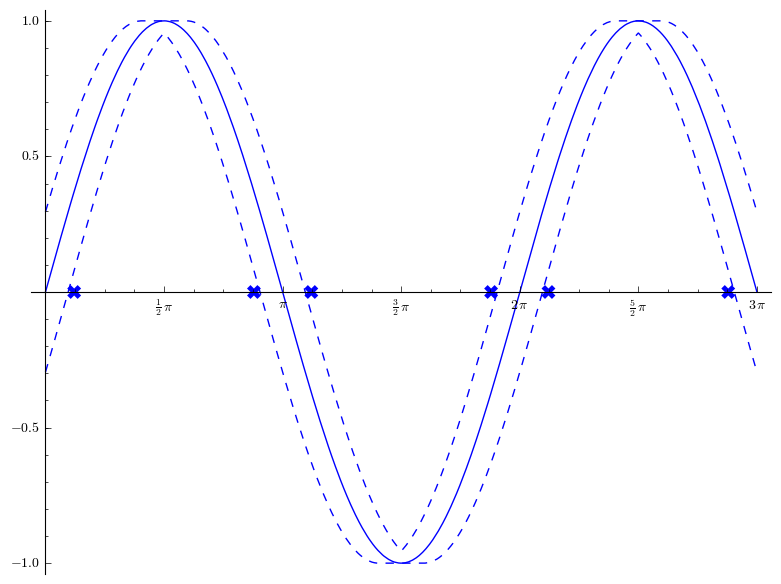

In [22]:
p = plot([partial(lower, sin, I), sin, partial(upper, sin, I)], 
         xmin=0, xmax=3*pi,
         color=['blue', 'blue', 'blue', 'green', 'green', 'green'],
         linestyle=['--', '-', '--', '--', '-', '--'],
         ticks=(pi/2,0.5), tick_formatter=pi)
p += point((x0.endpoints()[1], 0), marker='X', size=100)
p += point((x1.endpoints()[0], 0), marker='X', size=100)
p += point((x1.endpoints()[1], 0), marker='X', size=100)
p += point((x2.endpoints()[0], 0), marker='X', size=100)
p += point((x2.endpoints()[1], 0), marker='X', size=100)
p += point((x3.endpoints()[0], 0), marker='X', size=100)
p

## Example: time shifted sin function

In [23]:
def shift_plot(t0, I=RIF(-0.3,0.3)):
    t0 = RIF(t0)
    I = RIF(-0.3,0.3)
    def shift_sin_c(t):
        return sin((t + t0).center())
        
    shift_sin = lambda t: sin(t + t0)
    
    p = plot([partial(lower, shift_sin, I),
              (lambda t: sin(t + t0.lower())),
              (lambda t: sin(t + t0.upper())),
              partial(upper, shift_sin, I)], 
         xmin=0, xmax=3*pi,
         color=['grey', 'blue', 'orange', 'grey'],
         linestyle=['--', '-', '-', '--'],
         ticks=(pi/2,0.5), tick_formatter=pi)
    return p

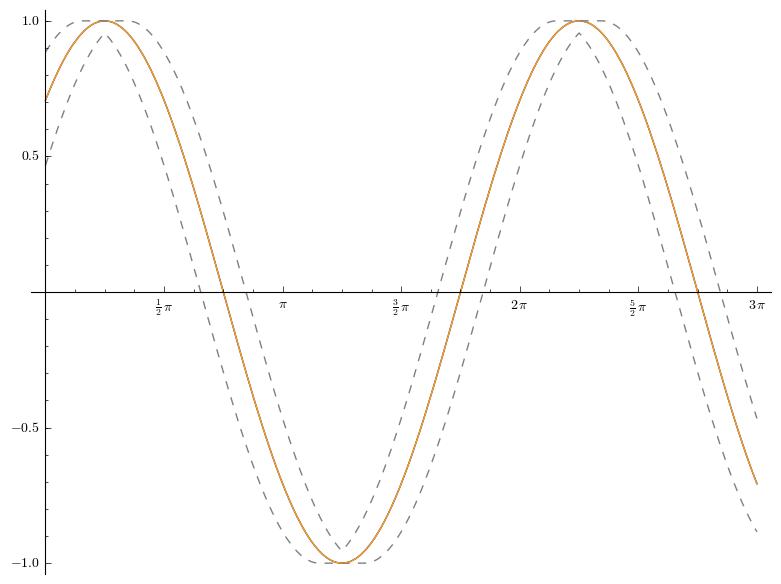

In [24]:
shift_plot(RIF(pi/4))

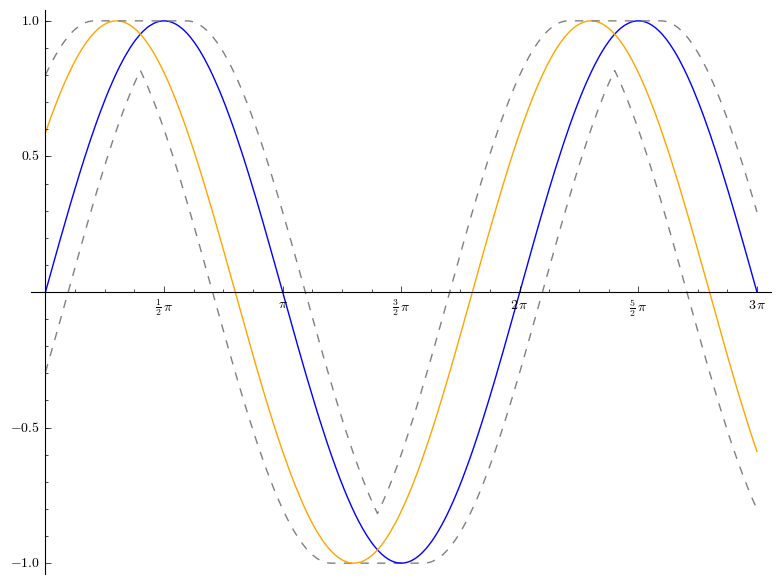

In [25]:
shift_plot(RIF(0,pi/5))

## Three-valued signals

In [26]:
load('interval_signals.py')

### Example: merging overlapping

In [27]:
Signal(RIF(0,pi), [(RIF(0,3*pi/4), True), (RIF(pi/4,pi), True)])

Signal([0.00000000000000000 .. 3.1415926535897936], [([0.00000000000000000 .. 3.1415926535897936], True)])

In [28]:
Signal(RIF(0,pi), [(RIF(0,pi/2), True), (RIF(pi/2), True)])

Signal([0.00000000000000000 .. 3.1415926535897936], [([0.00000000000000000 .. 1.5707963267948968], True)])

In [29]:
Signal(RIF(0,pi), [(RIF(0,3*pi/4), False), (RIF(pi/4,pi), False)])

Signal([0.00000000000000000 .. 3.1415926535897936], [([0.00000000000000000 .. 3.1415926535897936], False)])

In [30]:
try:
    Signal(RIF(0,pi), [(RIF(0,3*pi/4), True), (RIF(pi/4,pi), False)])
except Exception as e:
    print e

Inconsitient intervals 1.?e1 (True) and 1.?e1 (False) in signal!


### Example: sin signal

In [31]:
sig = Signal(RIF(0,3*pi),
             [(RIF(x0.endpoints()[1], x1.endpoints()[0]),True),
              (RIF(x1.endpoints()[1], x2.endpoints()[0]),False),
              (RIF(x2.endpoints()[1], x3.endpoints()[0]),True)])
sig

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.38007908243635935 .. 2.7615135711534329], True), ([3.5216717360261533 .. 5.9031062247432252], False), ([6.6632643896159482 .. 9.0446988783330174], True)])

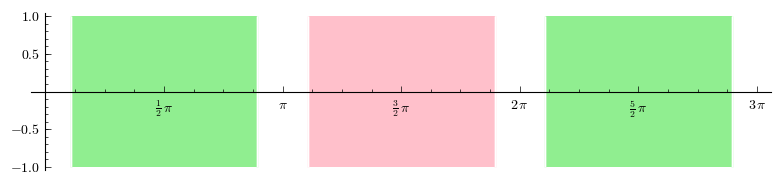

In [32]:
sig.plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Negation:

In [33]:
~sig

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.38007908243635935 .. 2.7615135711534329], False), ([3.5216717360261533 .. 5.9031062247432252], True), ([6.6632643896159482 .. 9.0446988783330174], False)])

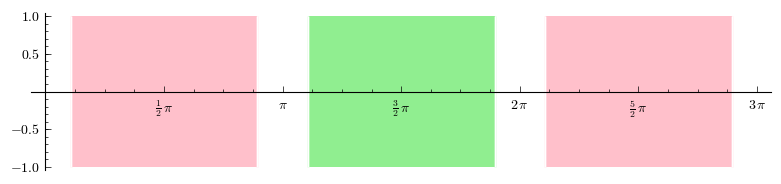

In [34]:
(~sig).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Backshifting:

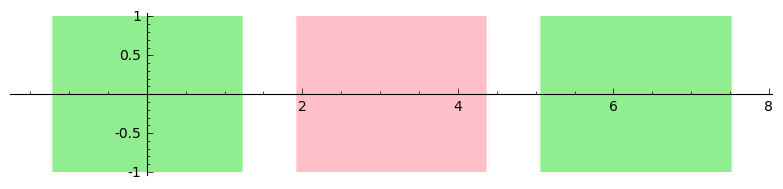

In [35]:
sig.F(pi/2).plot()

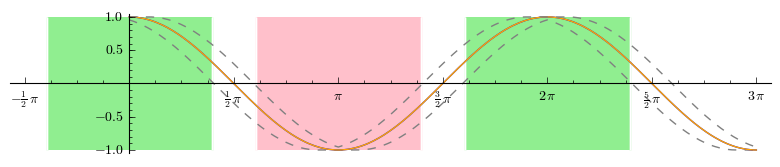

In [36]:
shift_plot(RIF(pi/2)) + sig.F(pi/2).plot(ticks=(pi/2,0.5), tick_formatter=pi)

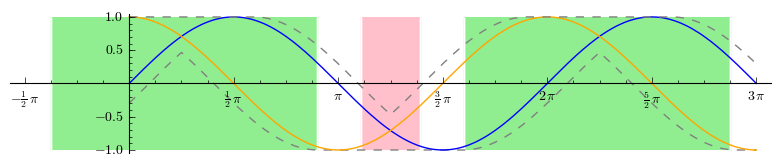

In [37]:
shift_plot(RIF(0,pi/2)) + sig.F(RIF(0,pi/2)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

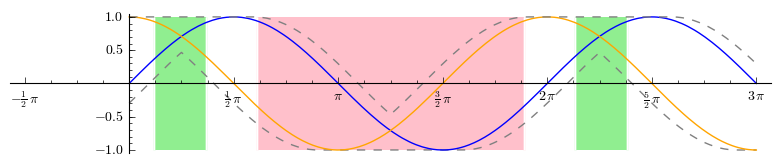

In [38]:
shift_plot(RIF(0,pi/2)) + sig.G(RIF(0,pi/2)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

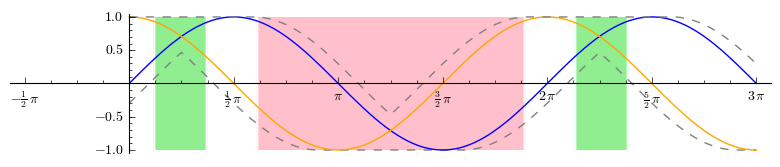

In [39]:
shift_plot(RIF(0,pi/2)) + (~(~sig).F(RIF(0,pi/2))).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Intersection:

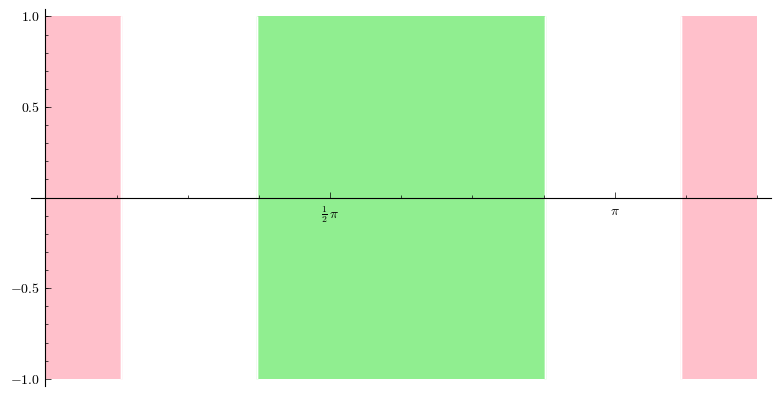

In [40]:
(sig & sig.F((7/4)*pi)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

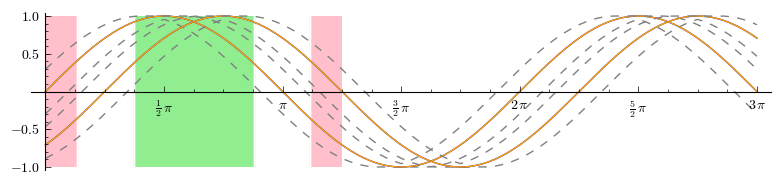

In [41]:
shift_plot(0) + shift_plot((7/4)*pi) + (sig & sig.F((7/4)*pi)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Union:

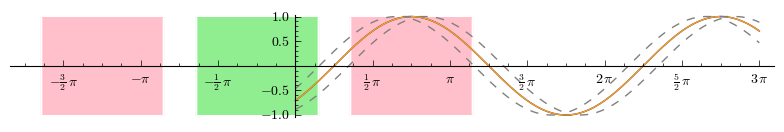

In [42]:
shift_plot((7/4)*pi) + (~sig.F((7/4)*pi)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

#### Truth value:

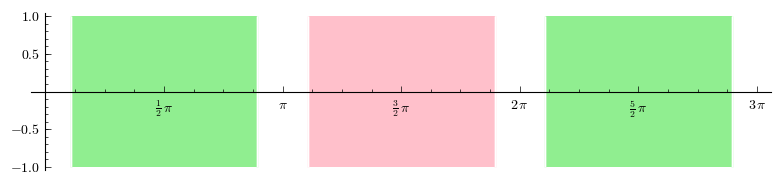

In [43]:
sig.plot(ticks=(pi/2,0.5), tick_formatter=pi)

In [44]:
bool(sig)

False

In [45]:
sig(pi/2)

True

In [46]:
sig(pi)

In [47]:
sig(3/2*pi)

False

#### Until

signal for $-\sin(x)$

In [48]:
sig2 = ~sig
sig2

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.38007908243635935 .. 2.7615135711534329], False), ([3.5216717360261533 .. 5.9031062247432252], True), ([6.6632643896159482 .. 9.0446988783330174], False)])

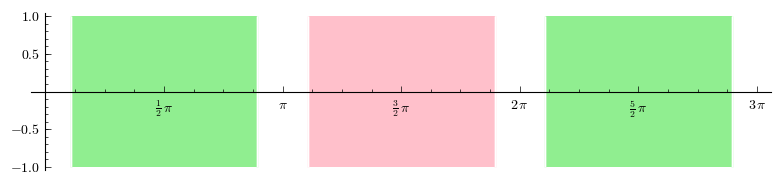

In [49]:
sig.plot(ticks=(pi/2,0.5), tick_formatter=pi)

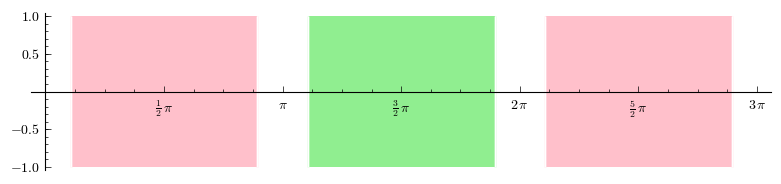

In [50]:
sig2.plot(ticks=(pi/2,0.5), tick_formatter=pi)

/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


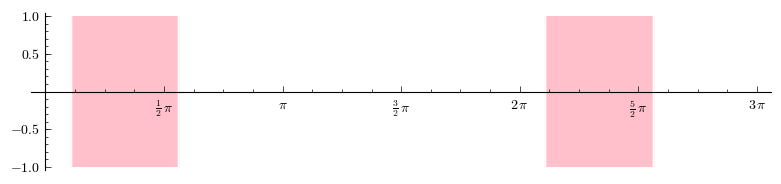

In [51]:
sig.U(RIF([0,pi/3]), sig2).plot(ticks=(pi/2,0.5), tick_formatter=pi)

Check $\mathrel{{\mathbf F}_{[a,b]}} \varphi \equiv \mathrm{true} \mathrel{{\mathbf U}_{[a,b]}} \varphi$: 

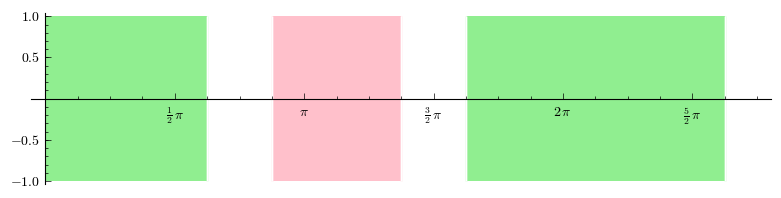

In [52]:
sig.F(RIF(pi/4,pi/2)).to_domain(RIF(0,11*pi/4)).plot(ticks=(pi/2,0.5), tick_formatter=pi)

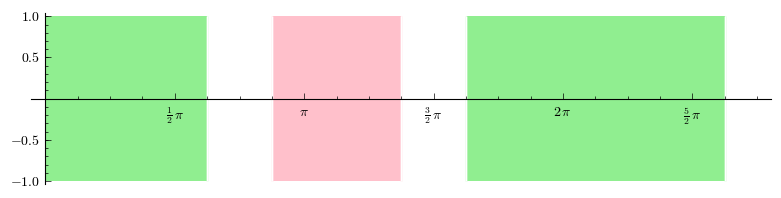

In [53]:
true_signal(RIF(0,3*pi)).U(RIF(pi/4,pi/2), sig).plot(ticks=(pi/2,0.5), tick_formatter=pi)

## Taylor models

In [54]:
load('taylor_models.py')

In [55]:
R.<x> = QQ[]

### Example: Sine Taylor model

In [56]:
sinTM = TM(x - (1/factorial(3))*x**3 + (1/factorial(5))*x**5 - (1/factorial(7))*x**7,
           (1/factorial(9))*sin(RIF(-pi,pi))*RIF(-pi,pi)**9)
str(sinTM)
#type(sinTM(1))
#sinTM(1).str(style='brackets')

'-1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x + [-0.082145886611128358 .. 0.082145886611128358]'

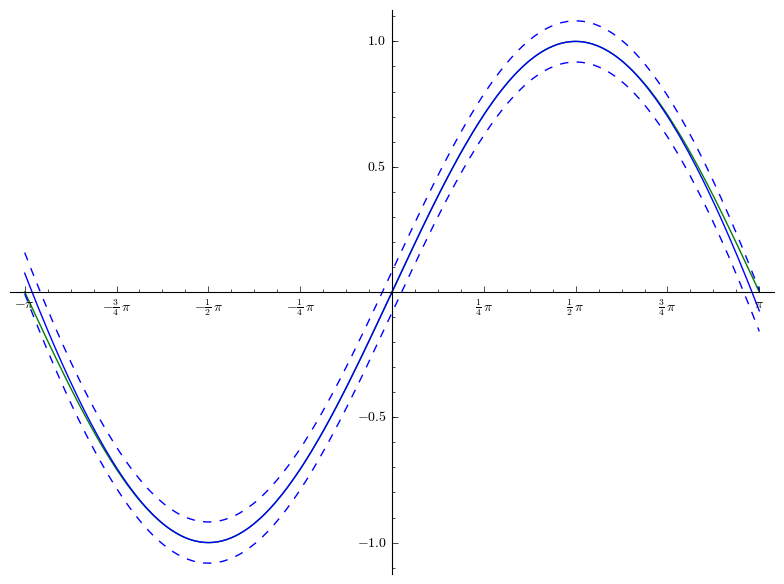

In [57]:
plot(sin, xmin=-pi, xmax=pi, color='green') + sinTM.plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)

In [58]:
sinTM.f(x-RIF(0,pi/2))

-0.0001984126984126985?*x^7 + 0.01?*x^6 + 0.00?*x^5 + 0.0?*x^4 + 0.?*x^3 + 0.?*x^2 + 0.?e1*x - 1.?

#### Taylor model multiplication:

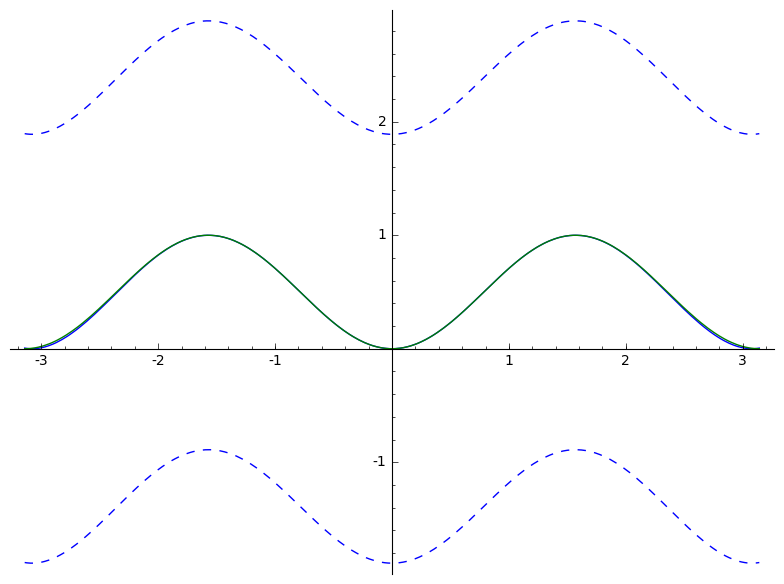

In [59]:
sinTM.mul(sinTM, RIF(-pi,pi), 15).plot(-pi, pi) + plot(sin(x)*sin(x), (x, -pi, pi), color='green')

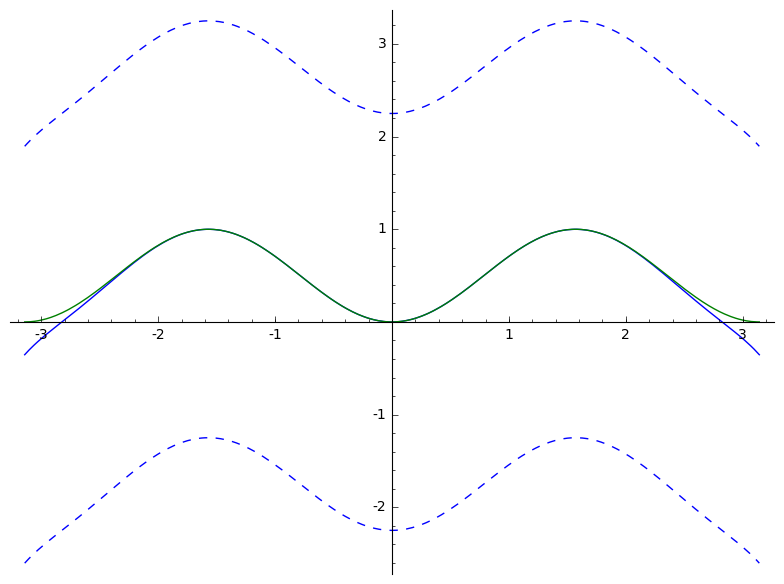

In [60]:
sinTM.mul(sinTM, RIF(-pi,pi), 13).plot(-pi, pi) + plot(sin(x)*sin(x), (x, -pi, pi), color='green')

#### Root detection:

In [61]:
a, b = newton(sinTM, sinTM.derivative(), RIF(-pi/4,pi/4), 10).endpoints()
a,b

b = 1.?
f(0) = [-0.13846788869053892 .. 0.13846788869053892]
b = 1.0?
f(1) = [-0.090443926172562750 .. 0.090443926172562750]
b = 1.0?
f(2) = [-0.089898630057776500 .. 0.089898630057776500]
b = 1.0?
f(3) = [-0.089893786260804979 .. 0.089893786260804979]
b = 1.0?
f(4) = [-0.089893743367904914 .. 0.089893743367904914]
b = 1.0?
f(5) = [-0.089893742988089276 .. 0.089893742988089276]
b = 1.0?
f(6) = [-0.089893742984726008 .. 0.089893742984726008]
b = 1.0?
f(7) = [-0.089893742984696227 .. 0.089893742984696227]
b = 1.0?
f(8) = [-0.089893742984695963 .. 0.089893742984695963]
b = 1.0?
f(9) = [-0.089893742984695963 .. 0.089893742984695963]


(-0.0898937429846960, 0.0898937429846960)

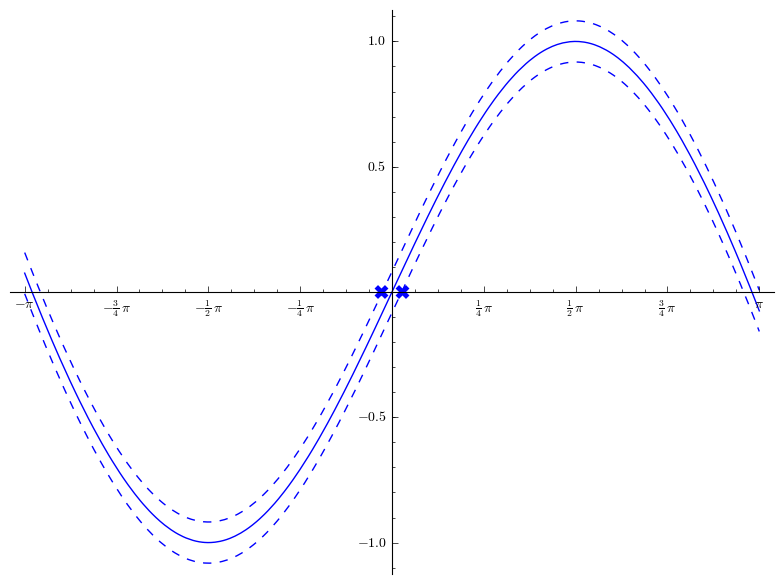

In [62]:
p = sinTM.plot(-pi, pi, ticks=(pi/4,0.5), tick_formatter=pi)
p += point((a, 0), marker='X', size=100)
p += point((b, 0), marker='X', size=100)
p

## Piecewise Taylor model

### Example: piecewise sine

In [63]:
seq = TMSeq([(RIF(0,1), sinTM), (RIF(1,2), sinTM.mul(TM(x, RIF(0)), RIF(1,2)))])
seq

TMSeq([(1.?, TM(-1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x, 0.0?)), (2.?, TM(-1/5040*x^8 + 1/120*x^6 - 1/6*x^4 + x^2, 0.?))])

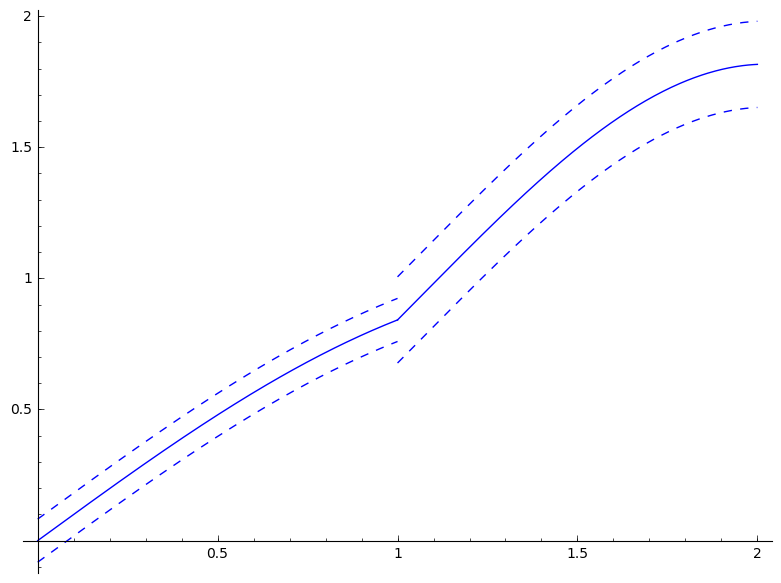

In [64]:
seq.plot()

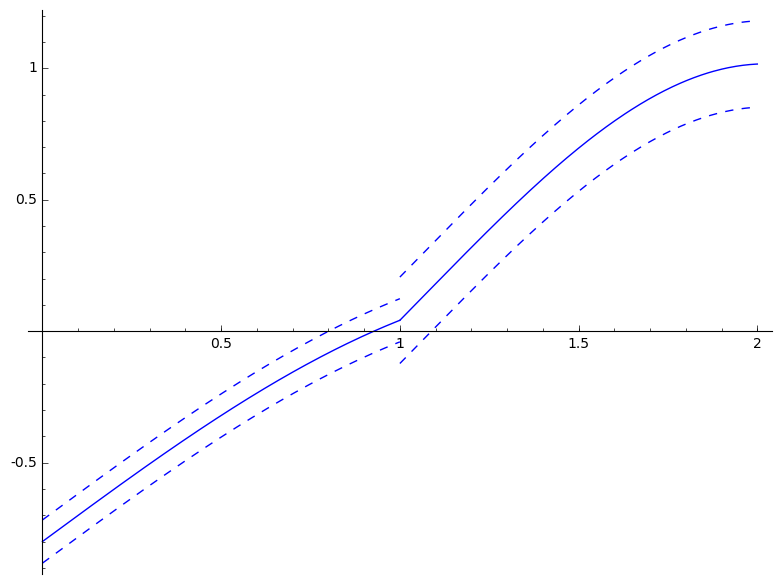

In [65]:
seq2 = seq.map(lambda x: x - 0.8)
plt = seq2.plot()
plt

#### Root detection:

In [66]:
a, b = newton(seq2, seq2.map(lambda x: x.derivative()), RIF(0.5,1.5), 10).endpoints()
a,b

b = 1.?e1
f(0) = [0.51916639450203383 .. 1.2870221024425228]
b = 1.?
f(1) = [0.74589867691294509 .. 1.1291219405363536]
b = 1.?
f(2) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(3) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(4) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(5) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(6) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(7) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(8) = [0.74589867691294509 .. 1.1102710529171778]
b = 1.?
f(9) = [0.74589867691294509 .. 1.1102710529171778]


(0.745898676912945, 1.11027105291718)

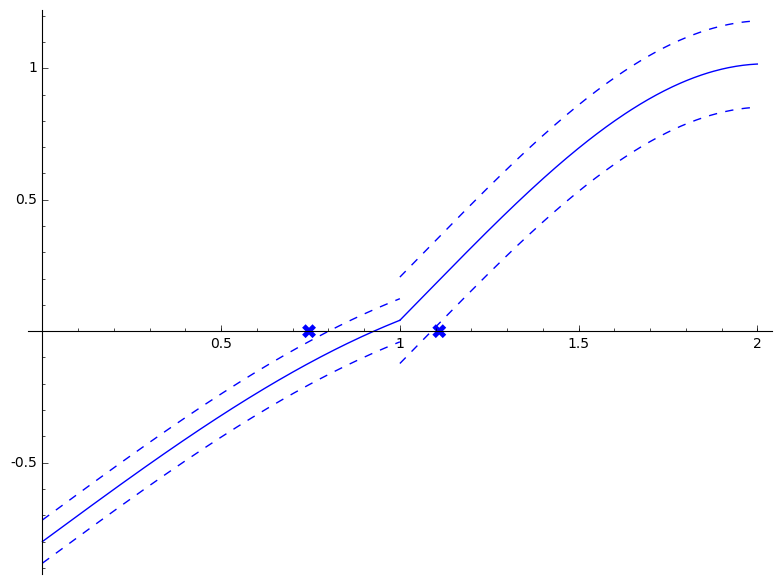

In [67]:
plt += point((a, 0), marker='X', size=100)
plt += point((b, 0), marker='X', size=100)
plt

## Signal generation

In [68]:
load('interval_root_isolation.py')

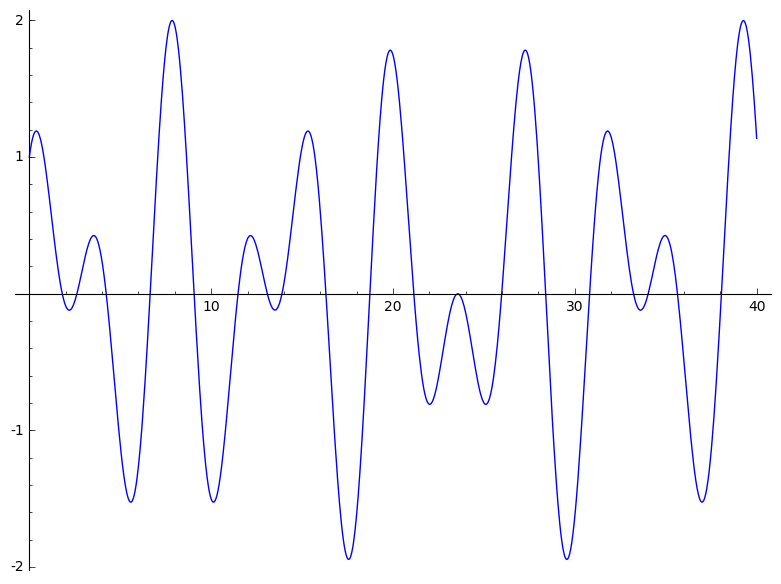

In [69]:
plot(sin(x) + cos(1.6*x), (x,0,40))

In [70]:
g(x) = sin(x) + cos(1.6*x)
g

x |--> cos(1.60000000000000*x) + sin(x)

In [71]:
h(x) = sin(x+RIF(0,0.2)) + cos(1.6*(x+RIF(0,0.2)))
h

x |--> cos(1.60000000000000*x + 1.?) + sin(x + 1.?)

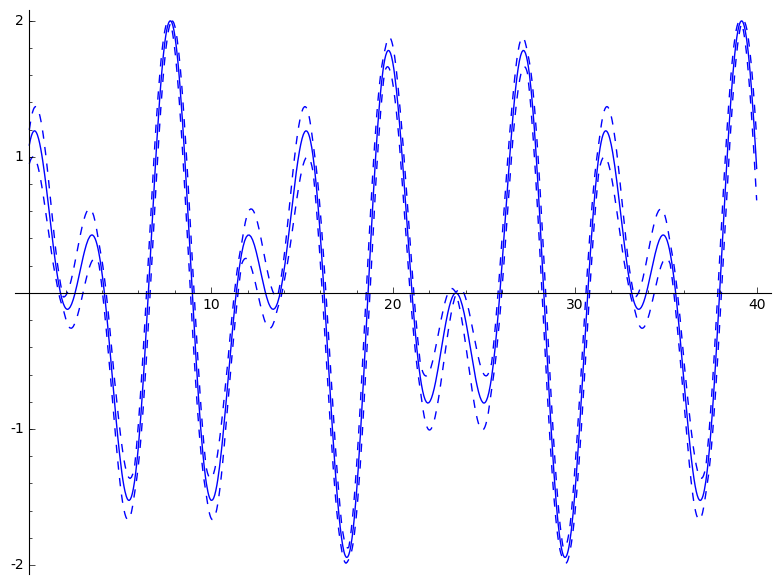

In [72]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=40,
         color=['blue', 'blue', 'blue', 'green', 'green', 'green'],
         linestyle=['--', '-', '--'])

In [73]:
g.derivative()

x |--> cos(x) - 1.60000000000000*sin(1.60000000000000*x)

In [74]:
int_dist(RIF(1,2), RIF(3 + 1/3,4))

2.33333333333334

In [75]:
ta = search_zero(g, g.derivative(), RIF(0,40))
ta.str(style='brackets')

t = [0.00000000000000000 .. 40.000000000000000]
b = 0.?e1
t = [0.38461538461538463 .. 40.000000000000000]
b = 0.?e1
t = [0.84298235669719434 .. 40.000000000000000]
b = 0.?e1
t = [1.2148421071808785 .. 40.000000000000000]
b = 0.?e1
t = [1.4352071807962092 .. 40.000000000000000]
b = 0.?e1
t = [1.5610863921072322 .. 40.000000000000000]
b = 0.?e1
t = [1.6380728918527696 .. 40.000000000000000]
b = 0.?e1
t = [1.6881708565255457 .. 40.000000000000000]
b = 0.?e1
t = [1.7222436090318271 .. 40.000000000000000]
b = 0.?e1
t = [1.7461407002099318 .. 40.000000000000000]
b = 0.?e1
t = [1.7632678705983457 .. 40.000000000000000]
b = 0.?e1
t = [1.7757346511305671 .. 40.000000000000000]
b = 0.?e1
t = [1.7849117381787857 .. 40.000000000000000]
b = 0.?e1
t = [1.7917231520698615 .. 40.000000000000000]
b = 0.?e1
t = [1.7968096695042874 .. 40.000000000000000]
b = 0.?e1
t = [1.8006254079860171 .. 40.000000000000000]
b = 0.?e1
t = [1.8034976116494791 .. 40.000000000000000]
b = 0.?e1
t = [1.8056651316725198 .. 4

'[1.8124573001245383 .. 1.8124573001843374]'

In [76]:
tb = search_zero(g, g.derivative(), RIF(ta.upper('RNDU')+0.0001,40), 1e-9, 0.001, 0.0000001)
tb.str(style='brackets')

t = [1.8125573001843375 .. 40.000000000000000]
b = 0.?e1
t = [1.8125812288465668 .. 40.000000000000000]
b = 0.?e1
t = [1.8126108824516387 .. 40.000000000000000]
b = 0.?e1
t = [1.8126476302317495 .. 40.000000000000000]
b = 0.?e1
t = [1.8126931686497793 .. 40.000000000000000]
b = 0.?e1
t = [1.8127495994707529 .. 40.000000000000000]
b = 0.?e1
t = [1.8128195263885482 .. 40.000000000000000]
b = 0.?e1
t = [1.8129061745796670 .. 40.000000000000000]
b = 0.?e1
t = [1.8130135385653942 .. 40.000000000000000]
b = 0.?e1
t = [1.8131465649951570 .. 40.000000000000000]
b = 0.?e1
t = [1.8133113784600864 .. 40.000000000000000]
b = 0.?e1
t = [1.8135155602540649 .. 40.000000000000000]
b = 0.?e1
t = [1.8137684921702716 .. 40.000000000000000]
b = 0.?e1
t = [1.8140817800040338 .. 40.000000000000000]
b = 0.?e1
t = [1.8144697744697340 .. 40.000000000000000]
b = 0.?e1
t = [1.8149502107534263 .. 40.000000000000000]
b = 0.?e1
t = [1.8155449918977140 .. 40.000000000000000]
b = 0.?e1
t = [1.8162811455651746 .. 40.0

'[2.6179938779914944 .. 2.6179938779914949]'

In [77]:
search_zero(g, g.derivative(), RIF(0,1))

t = [0.00000000000000000 .. 1.0000000000000000]
b = 0.?e1
t = [0.94366535431525422 .. 1.0000000000000000]
b = -1.1?
stopping since presumed converged
t = [0.94366535431525422 .. 1.0000000000000000], fprime(t) = [-1.0596976941318606 .. -1.0102066920815750]


In [78]:
g(23.543737610469488+0.3)

-0.0604894014118164

In [79]:
zs = list(isolate_roots(g, g.derivative(), RIF(0,23), 0.001))
zs

t = [0.00000000000000000 .. 23.000000000000000]
b = 0.?e1
t = [0.38461538461538463 .. 23.000000000000000]
b = 0.?e1
t = [0.84298235669719434 .. 23.000000000000000]
b = 0.?e1
t = [1.2148421071808785 .. 23.000000000000000]
b = 0.?e1
t = [1.4352071807962092 .. 23.000000000000000]
b = 0.?e1
t = [1.5610863921072322 .. 23.000000000000000]
b = 0.?e1
t = [1.6380728918527696 .. 23.000000000000000]
b = 0.?e1
t = [1.6881708565255457 .. 23.000000000000000]
b = 0.?e1
t = [1.7222436090318271 .. 23.000000000000000]
b = 0.?e1
t = [1.7461407002099318 .. 23.000000000000000]
b = 0.?e1
t = [1.7632678705983457 .. 23.000000000000000]
b = 0.?e1
t = [1.7757346511305671 .. 23.000000000000000]
b = 0.?e1
t = [1.7849117381787857 .. 23.000000000000000]
b = 0.?e1
t = [1.7917231520698615 .. 23.000000000000000]
b = 0.?e1
t = [1.7968096695042874 .. 23.000000000000000]
b = 0.?e1
t = [1.8006254079860171 .. 23.000000000000000]
b = 0.?e1
t = [1.8034976116494791 .. 23.000000000000000]
b = 0.?e1
t = [1.8056651316725198 .. 2

b = 0.?e1
t = [4.2973528290057920 .. 23.000000000000000]
b = 0.?e1
t = [4.3302754460227657 .. 23.000000000000000]
b = 0.?e1
t = [4.3798648375228035 .. 23.000000000000000]
b = 0.?e1
t = [4.4554247393416002 .. 23.000000000000000]
b = 0.?e1
t = [4.5722726089777578 .. 23.000000000000000]
b = 0.?e1
t = [4.7559201381159104 .. 23.000000000000000]
b = 0.?e1
t = [5.0470633342372011 .. 23.000000000000000]
b = 0.?e1
t = [5.4947689678103746 .. 23.000000000000000]
b = 0.?e1
t = [6.0776177521744312 .. 23.000000000000000]
b = 0.?e1
t = [6.5236305780327299 .. 23.000000000000000]
b = 0.?e1
t = [6.6356138295825211 .. 23.000000000000000]
b = 0.?e1
t = [6.6450117563217112 .. 23.000000000000000]
b = 0.?e1
t = [6.6456335051671491 .. 23.000000000000000]
b = 0.?e1
t = [6.6456739556800084 .. 23.000000000000000]
b = 0.?e1
found lower bound!
t = [6.6456765845046072 .. 6.7122333503496528]
b = 2.5?
t = [6.6456765845046072 .. 6.6466675780850118]
b = 2.431?
t = [6.6456765845046072 .. 6.6456770215836621]
b = 2.431042

b = 0.?e1
t = [22.621464190491142 .. 23.000000000000000]
b = 1.?
stopping since presumed converged
t = [22.621464190491142 .. 23.000000000000000], fprime(t) = [0.44459769674724147 .. 1.0636805748532885]


[1.8124573002?,
 2.6179938780?,
 4.229067034?,
 6.6456767672092?,
 9.062286500740?,
 11.4788962342704?,
 13.0899693900?,
 13.89550596780101?,
 16.31211570133162?,
 18.728725434863?,
 21.145335168393?]

z = [1.8124573001245383 .. 1.8124573001843374]
z = [2.6179938779747695 .. 2.6179938780021237]
z = [4.2290670335651698 .. 4.2290670337510435]
z = [6.6456767672091432 .. 6.6456767672092019]
z = [9.0622865007393134 .. 9.0622865007403509]
z = [11.478896234270349 .. 11.478896234270471]
z = [13.089969389920847 .. 13.089969390014416]
z = [13.895505967801007 .. 13.895505967801010]
z = [16.312115701331617 .. 16.312115701331621]
z = [18.728725434862088 .. 18.728725434862370]
z = [21.145335168392502 .. 21.145335168393363]


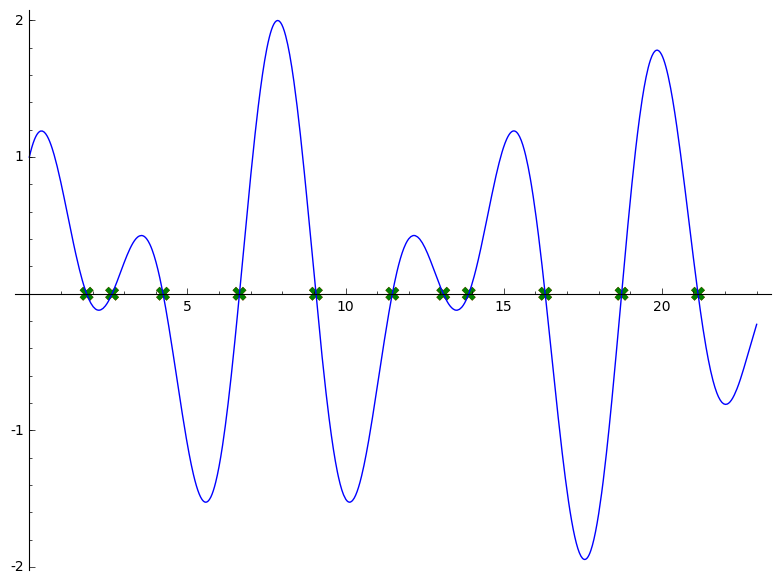

In [80]:
p =  plot(g, (0,23))
for z in zs:
    print 'z =', z.str(style='brackets')
    p += point((z.lower(), 0), marker='X', size=100, color='red')
    p += point((z.upper(), 0), marker='X', size=100, color='green')
p

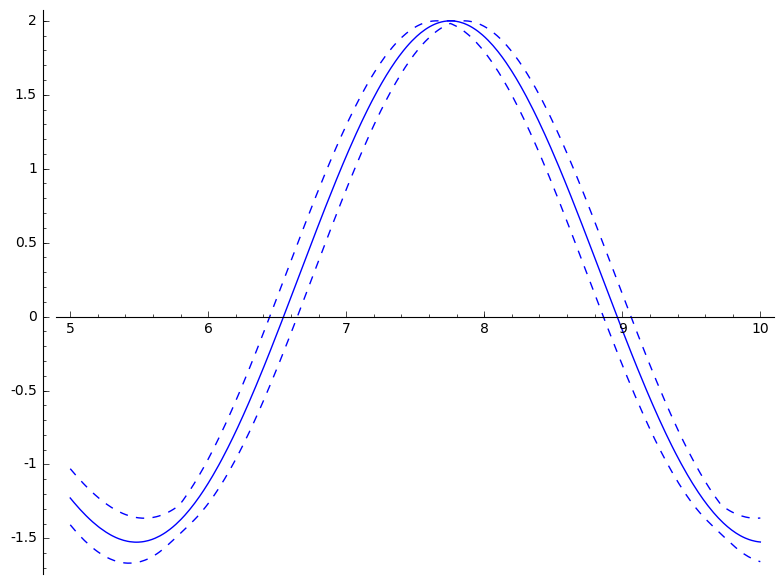

In [81]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=5, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])

In [82]:
RIF(h(6.4456766511496752)).str(style='brackets')

'[-0.46895127350575977 .. -2.8214554792516111e-7]'

In [83]:
RIF(h(6.4456766511496753)).str(style='brackets')

'[-0.46895127350575889 .. -2.8214554709249384e-7]'

In [84]:
zs = list(isolate_roots(h, h.derivative(), RIF(5,10), 0.001))
zs

t = [5.0000000000000000 .. 10.000000000000000]
b = 0.?e1
t = [5.3957518036649094 .. 10.000000000000000]
b = 0.?e1
t = [5.9100907541399170 .. 10.000000000000000]
b = 0.?e1
t = [6.3374501725412635 .. 10.000000000000000]
b = 0.?e1
t = [6.4370717951898406 .. 10.000000000000000]
b = 0.?e1
t = [6.4451462110556692 .. 10.000000000000000]
b = 0.?e1
t = [6.4456447691632448 .. 10.000000000000000]
b = 0.?e1
t = [6.4456748400390857 .. 10.000000000000000]
b = 0.?e1
found lower bound!
t = [6.4456766511496752 .. 6.7078030104497213]
b = 3.?
t = [6.4456766511496752 .. 6.6490795269096826]
b = 3.?
t = [6.4456766511496752 .. 6.6458791055151121]
b = 3.?
t = [6.4456766511496752 .. 6.6456888435329633]
b = 3.?
t = [6.4456766511496752 .. 6.6456774881255090]
b = 3.?
found upper bound!
t = [6.6466768102460358 .. 10.000000000000000]
b = 0.?e1
t = [6.6476119728139950 .. 10.000000000000000]
b = 0.?e1
t = [6.6494218176741570 .. 10.000000000000000]
b = 0.?e1
t = [6.6529249766819154 .. 10.000000000000000]
b = 0.?e1
t =

[7.?, 9.?]

z = [6.4456766511496752 .. 6.6456768102460356]
z = [8.8622863440827313 .. 9.0622865643120357]


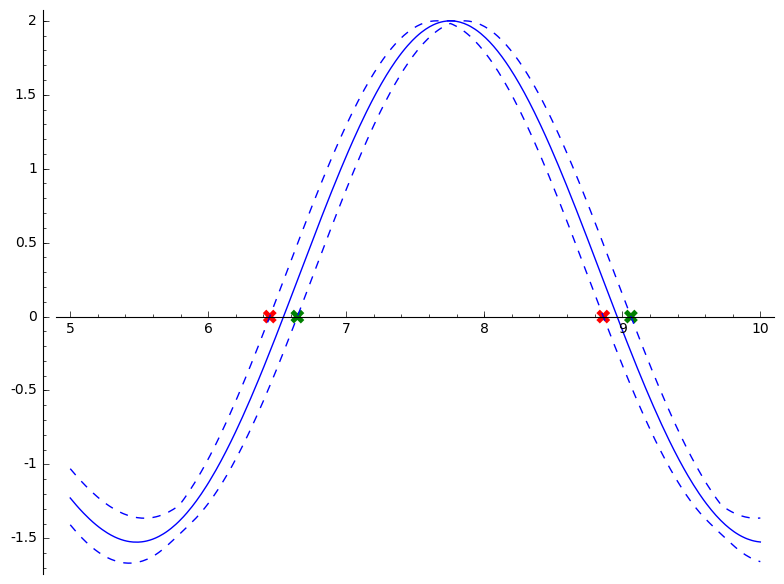

In [85]:
p = plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=5, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])
for z in zs:
    print 'z =', z.str(style='brackets')
    p += point((z.lower(), 0), marker='X', size=100, color='red')
    p += point((z.upper(), 0), marker='X', size=100, color='green')
p

In [86]:
search_zero(seq2, seq2.map(lambda x: x.derivative()), RIF(0.5,1.5)).str(style='brackets')

t = [0.50000000000000000 .. 1.5000000000000000]
b = 1.?e1
t = [0.60243165119724373 .. 1.4411034891747381]
b = 1.?e1
t = [0.67021730006802027 .. 1.3319546525971516]
b = 1.?e1
t = [0.71728066920076805 .. 1.2688908573310201]
b = 1.?
t = [0.74823450000825941 .. 1.2298664986376800]
b = 1.?
t = [0.76803648895159715 .. 1.2064507456479848]
b = 1.?
t = [0.78048603830030671 .. 1.1924392961609128]
b = 1.?
t = [0.78823508068342706 .. 1.1840246582523526]
b = 1.?
t = [0.79303091856883956 .. 1.1789426139218473]
b = 1.?
t = [0.79598934067094118 .. 1.1758575624638308]
b = 1.?
t = [0.79781083931913832 .. 1.1739775274735412]
b = 1.?
t = [0.79893107364064763 .. 1.1728287614101594]
b = 1.?
t = [0.79961956181355187 .. 1.1721255869976921]
b = 1.?
t = [0.80004252985159296 .. 1.1716946784624430]
b = 1.?
t = [0.80030231324085254 .. 1.1714304277394541]
b = 1.?
t = [0.80046184597425107 .. 1.1712683064625789]
b = 1.?
t = [0.80055980585525177 .. 1.1711688155709659]
b = 1.?
t = [0.80061995399576479 .. 1.171107749438

'[0.80070202647999721 .. 1.0884727018838710]'

In [87]:
sigg = to_signal(g, g.derivative(), RIF(0,23))

t = [0.00000000000000000 .. 23.000000000000000]
b = 0.?e1
t = [0.38461538461538463 .. 23.000000000000000]
b = 0.?e1
t = [0.84298235669719434 .. 23.000000000000000]
b = 0.?e1
t = [1.2148421071808785 .. 23.000000000000000]
b = 0.?e1
t = [1.4352071807962092 .. 23.000000000000000]
b = 0.?e1
t = [1.5610863921072322 .. 23.000000000000000]
b = 0.?e1
t = [1.6380728918527696 .. 23.000000000000000]
b = 0.?e1
t = [1.6881708565255457 .. 23.000000000000000]
b = 0.?e1
t = [1.7222436090318271 .. 23.000000000000000]
b = 0.?e1
t = [1.7461407002099318 .. 23.000000000000000]
b = 0.?e1
t = [1.7632678705983457 .. 23.000000000000000]
b = 0.?e1
t = [1.7757346511305671 .. 23.000000000000000]
b = 0.?e1
t = [1.7849117381787857 .. 23.000000000000000]
b = 0.?e1
t = [1.7917231520698615 .. 23.000000000000000]
b = 0.?e1
t = [1.7968096695042874 .. 23.000000000000000]
b = 0.?e1
t = [1.8006254079860171 .. 23.000000000000000]
b = 0.?e1
t = [1.8034976116494791 .. 23.000000000000000]
b = 0.?e1
t = [1.8056651316725198 .. 2

t = [4.2753099856771923 .. 23.000000000000000]
b = 0.?e1
t = [4.2973528290057920 .. 23.000000000000000]
b = 0.?e1
t = [4.3302754460227657 .. 23.000000000000000]
b = 0.?e1
t = [4.3798648375228035 .. 23.000000000000000]
b = 0.?e1
t = [4.4554247393416002 .. 23.000000000000000]
b = 0.?e1
t = [4.5722726089777578 .. 23.000000000000000]
b = 0.?e1
t = [4.7559201381159104 .. 23.000000000000000]
b = 0.?e1
t = [5.0470633342372011 .. 23.000000000000000]
b = 0.?e1
t = [5.4947689678103746 .. 23.000000000000000]
b = 0.?e1
t = [6.0776177521744312 .. 23.000000000000000]
b = 0.?e1
t = [6.5236305780327299 .. 23.000000000000000]
b = 0.?e1
t = [6.6356138295825211 .. 23.000000000000000]
b = 0.?e1
t = [6.6450117563217112 .. 23.000000000000000]
b = 0.?e1
t = [6.6456335051671491 .. 23.000000000000000]
b = 0.?e1
t = [6.6456739556800084 .. 23.000000000000000]
b = 0.?e1
found lower bound!
t = [6.6456765845046072 .. 6.7122333503496528]
b = 2.5?
t = [6.6456765845046072 .. 6.6466675780850118]
b = 2.431?
t = [6.64567

In [88]:
sigh = to_signal(h, h.derivative(), RIF(5,10))

t = [5.0000000000000000 .. 10.000000000000000]
b = 0.?e1
t = [5.3957518036649094 .. 10.000000000000000]
b = 0.?e1
t = [5.9100907541399170 .. 10.000000000000000]
b = 0.?e1
t = [6.3374501725412635 .. 10.000000000000000]
b = 0.?e1
t = [6.4370717951898406 .. 10.000000000000000]
b = 0.?e1
t = [6.4451462110556692 .. 10.000000000000000]
b = 0.?e1
t = [6.4456447691632448 .. 10.000000000000000]
b = 0.?e1
t = [6.4456748400390857 .. 10.000000000000000]
b = 0.?e1
found lower bound!
t = [6.4456766511496752 .. 6.7078030104497213]
b = 3.?
t = [6.4456766511496752 .. 6.6490795269096826]
b = 3.?
t = [6.4456766511496752 .. 6.6458791055151121]
b = 3.?
t = [6.4456766511496752 .. 6.6456888435329633]
b = 3.?
t = [6.4456766511496752 .. 6.6456774881255090]
b = 3.?
found upper bound!
  I  = [5.0000000000000000 .. 6.4456766511496753]
f(I) = [-1.9589242746631386 .. 0.20910474471639976]
t = [6.6466768102460358 .. 10.000000000000000]
b = 0.?e1
t = [6.6476119728139950 .. 10.000000000000000]
b = 0.?e1
t = [6.64942181

In [89]:
g(x)

cos(1.60000000000000*x) + sin(x)

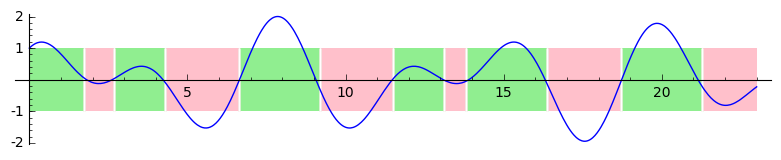

In [90]:
plot(g, (0,23)) + sigg.plot()

In [91]:
#plot(g, (8,10)) + to_signal(g, g.derivative(), RIF(8,10)).plot()

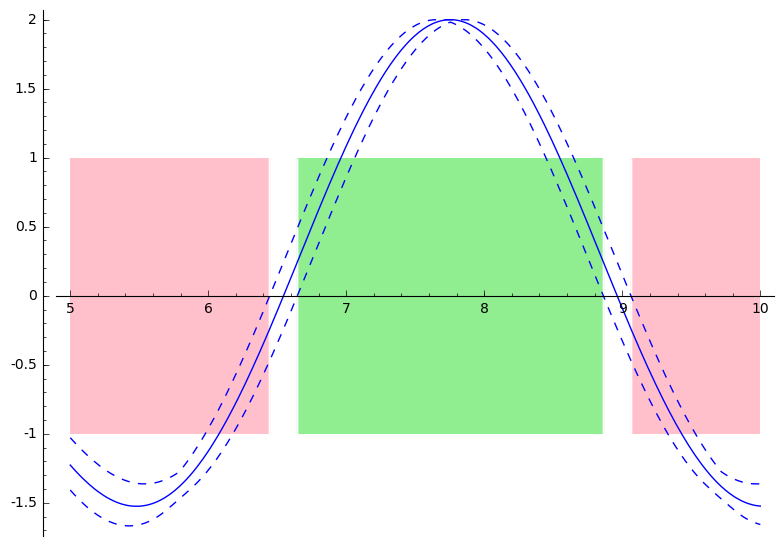

In [92]:
(plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=5, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])
 + sigh.plot())

### Checking some properties

In [93]:
sigg.G(RIF(0,1))(0)

True

In [94]:
sigg.G(RIF(0,2))(0)

False

In [95]:
sigg.F(RIF(0,2))(0)

True

In [96]:
sigh.G(RIF(7,8))(0)

True

In [97]:
sigh.G(RIF(6.5,8))(0) is None

True

In [98]:
sigh.G(RIF(6,8))(0)

False

In [99]:
sigh.F(RIF(6,8))(0)

True

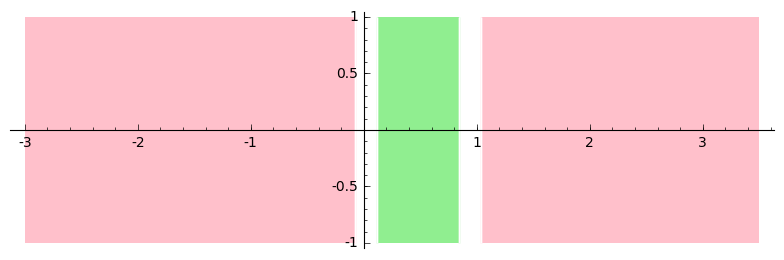

In [100]:
sigh.G(RIF(6.5,8)).plot()

### Lower boundary case

In [101]:
sigh2 = to_signal(h, h.derivative(), RIF(2.25,5))

0 on lower boundary!
t = [2.2500000000000000 .. 2.9761175851900324]
b = 0.?
t = [2.2500000000000000 .. 2.9608257653471815]
b = 0.?
t = [2.2500000000000000 .. 2.9549628506163491]
b = 0.?
t = [2.2500000000000000 .. 2.9527184630231478]
b = 0.?
t = [2.2500000000000000 .. 2.9518595694989101]
b = 0.?
t = [2.2500000000000000 .. 2.9515309124998770]
b = 0.?
t = [2.2500000000000000 .. 2.9514051548567446]
b = 0.?
t = [2.2500000000000000 .. 2.9513570352974568]
b = 0.?
t = [2.2500000000000000 .. 2.9513386230281614]
b = 0.?
found upper bound!
t = [2.9523315778431817 .. 5.0000000000000000]
b = 0.?e1
t = [2.9525633406034006 .. 5.0000000000000000]
b = 0.?e1
t = [2.9528485828532411 .. 5.0000000000000000]
b = 0.?e1
t = [2.9531996444978716 .. 5.0000000000000000]
b = 0.?e1
t = [2.9536317124463544 .. 5.0000000000000000]
b = 0.?e1
t = [2.9541634772624161 .. 5.0000000000000000]
b = 0.?e1
t = [2.9548179411394297 .. 5.0000000000000000]
b = 0.?e1
t = [2.9556234119803730 .. 5.0000000000000000]
b = 0.?e1
t = [2.95

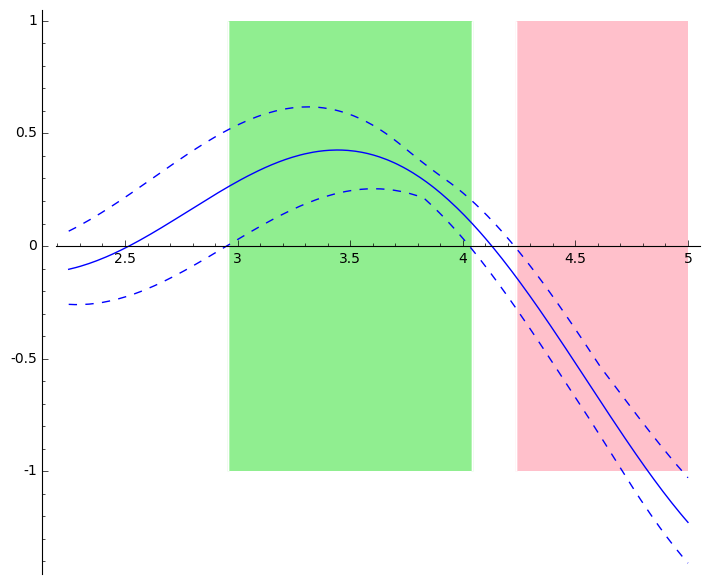

In [102]:
plot([(lambda x: RIF(h(x)).lower()), h(x), (lambda x: RIF(h(x)).upper())], 
         xmin=2.25, xmax=5,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) \
    + sigh2.plot()

### Upper boundary case

In [103]:
sigh3 = to_signal(h, h.derivative(), RIF(0,2.25))

t = [0.00000000000000000 .. 2.2500000000000000]
b = 0.?e1
t = [0.40048219618299535 .. 2.2500000000000000]
b = 0.?e1
t = [0.80666628697194775 .. 2.2500000000000000]
b = 0.?e1
t = [1.0944548276113668 .. 2.2500000000000000]
b = 0.?e1
t = [1.2689054005244879 .. 2.2500000000000000]
b = 0.?e1
t = [1.3831754879076989 .. 2.2500000000000000]
b = 0.?e1
t = [1.4621222102520912 .. 2.2500000000000000]
b = 0.?e1
t = [1.5184229329652099 .. 2.2500000000000000]
b = 0.?e1
t = [1.5542324571522301 .. 2.2500000000000000]
b = 0.?e1
t = [1.5764451024474224 .. 2.2500000000000000]
b = 0.?e1
t = [1.5902064450405628 .. 2.2500000000000000]
b = 0.?e1
t = [1.5987197742783028 .. 2.2500000000000000]
b = 0.?e1
t = [1.6039803648134571 .. 2.2500000000000000]
b = 0.?e1
t = [1.6072283233044664 .. 2.2500000000000000]
b = 0.?e1
t = [1.6092325450813200 .. 2.2500000000000000]
b = 0.?e1
t = [1.6104688488371174 .. 2.2500000000000000]
b = 0.?e1
t = [1.6112312886823909 .. 2.2500000000000000]
b = 0.?e1
t = [1.6117014250217360 .. 2

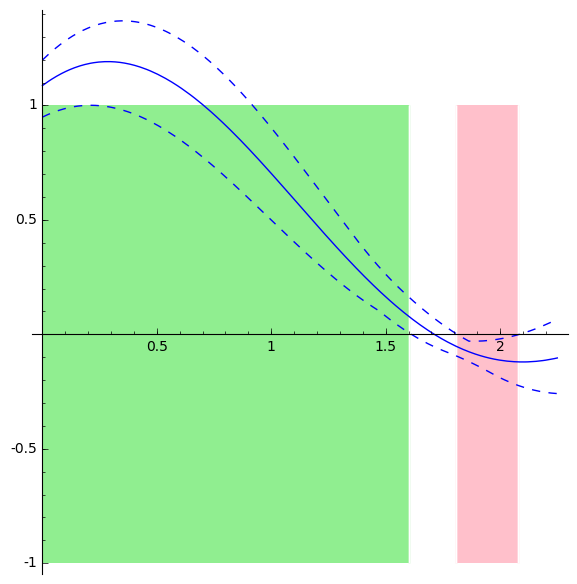

In [104]:
plot([(lambda x: RIF(h(x)).lower()), h(x), (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=2.25,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) \
    + sigh3.plot()

### Dealing with unknown region

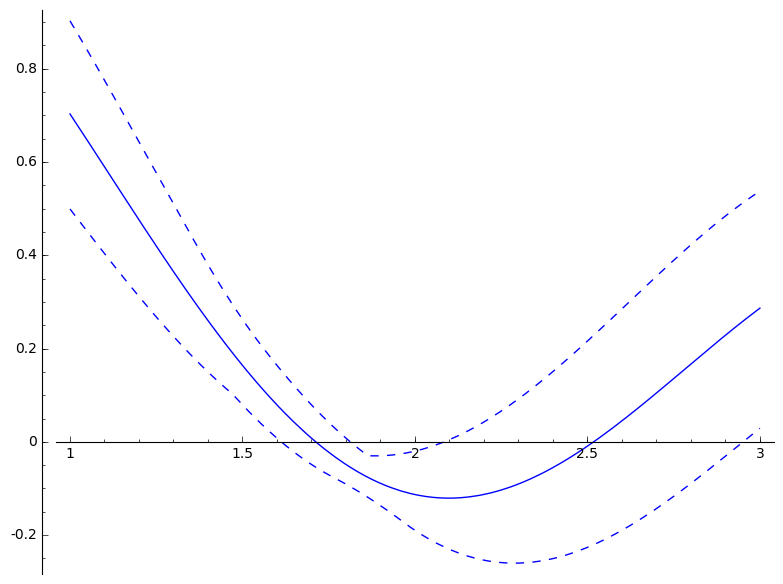

In [105]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=1, xmax=3,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'])

In [106]:
sigh = to_signal(h, h.derivative(), RIF(1,3.2))
sigh

t = [1.0000000000000000 .. 3.2000000000000002]
b = 0.?e1
t = [1.1920970727034831 .. 3.2000000000000002]
b = 0.?e1
t = [1.3190778215379983 .. 3.2000000000000002]
b = 0.?e1
t = [1.4079357891233952 .. 3.2000000000000002]
b = 0.?e1
t = [1.4722792287834118 .. 3.2000000000000002]
b = 0.?e1
t = [1.5198676334090330 .. 3.2000000000000002]
b = 0.?e1
t = [1.5511625589676349 .. 3.2000000000000002]
b = 0.?e1
t = [1.5718296448155086 .. 3.2000000000000002]
b = 0.?e1
t = [1.5855091499925435 .. 3.2000000000000002]
b = 0.?e1
t = [1.5945751467119761 .. 3.2000000000000002]
b = 0.?e1
t = [1.6005880512551775 .. 3.2000000000000002]
b = 0.?e1
t = [1.6045778256770379 .. 3.2000000000000002]
b = 0.?e1
t = [1.6072259195825011 .. 3.2000000000000002]
b = 0.?e1
t = [1.6089838227291088 .. 3.2000000000000002]
b = 0.?e1
t = [1.6101509161623586 .. 3.2000000000000002]
b = 0.?e1
t = [1.6109258206528156 .. 3.2000000000000002]
b = 0.?e1
t = [1.6114403516730770 .. 3.2000000000000002]
b = 0.?e1
t = [1.6117820073462891 .. 3.20

Signal([1.0000000000000000 .. 3.2000000000000002], [([1.0000000000000000 .. 1.6124403448348355], True), ([1.8124648242308618 .. 2.0846334832746521], False), ([2.9513325536799346 .. 3.2000000000000002], True)])

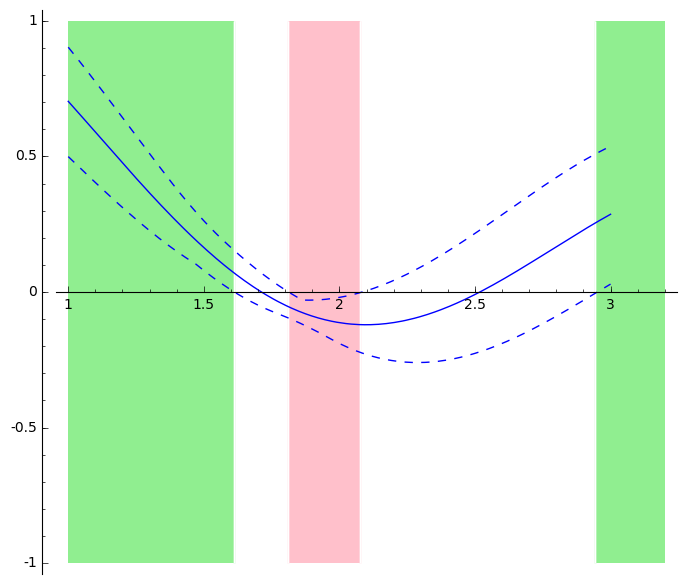

In [107]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=1, xmax=3,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + sigh.plot()

In [108]:
sigh = to_signal(h, h.derivative(), RIF(0,40))

t = [0.00000000000000000 .. 40.000000000000000]
b = 0.?e1
t = [0.36509054541632340 .. 40.000000000000000]
b = 0.?e1
t = [0.74024120745358656 .. 40.000000000000000]
b = 0.?e1
t = [1.0251749022054170 .. 40.000000000000000]
b = 0.?e1
t = [1.2079034804965527 .. 40.000000000000000]
b = 0.?e1
t = [1.3250742365150449 .. 40.000000000000000]
b = 0.?e1
t = [1.4043319534612694 .. 40.000000000000000]
b = 0.?e1
t = [1.4607936626530344 .. 40.000000000000000]
b = 0.?e1
t = [1.5027034087530406 .. 40.000000000000000]
b = 0.?e1
t = [1.5323622589438592 .. 40.000000000000000]
b = 0.?e1
t = [1.5533552029330246 .. 40.000000000000000]
b = 0.?e1
t = [1.5684995404121846 .. 40.000000000000000]
b = 0.?e1
t = [1.5795752003097356 .. 40.000000000000000]
b = 0.?e1
t = [1.5877564659304628 .. 40.000000000000000]
b = 0.?e1
t = [1.5938442727884707 .. 40.000000000000000]
b = 0.?e1
t = [1.5983990606512259 .. 40.000000000000000]
b = 0.?e1
t = [1.6018207643632873 .. 40.000000000000000]
b = 0.?e1
t = [1.6043991133209603 .. 4

t = [4.2436391302087699 .. 40.000000000000000]
b = 0.?e1
t = [4.2504670547540079 .. 40.000000000000000]
b = 0.?e1
t = [4.2605322874614000 .. 40.000000000000000]
b = 0.?e1
t = [4.2754131110009403 .. 40.000000000000000]
b = 0.?e1
t = [4.2975063115889868 .. 40.000000000000000]
b = 0.?e1
t = [4.3305054880499449 .. 40.000000000000000]
b = 0.?e1
t = [4.3802130198386945 .. 40.000000000000000]
b = 0.?e1
t = [4.4559586815745539 .. 40.000000000000000]
b = 0.?e1
t = [4.5731046592080932 .. 40.000000000000000]
b = 0.?e1
t = [4.7572365328168499 .. 40.000000000000000]
b = 0.?e1
t = [5.0380588603631730 .. 40.000000000000000]
b = 0.?e1
t = [5.4497616593030393 .. 40.000000000000000]
b = 0.?e1
t = [5.9703062777299180 .. 40.000000000000000]
b = 0.?e1
t = [6.3603368086293015 .. 40.000000000000000]
b = 0.?e1
t = [6.4391682809356316 .. 40.000000000000000]
b = 0.?e1
t = [6.4452492308028954 .. 40.000000000000000]
b = 0.?e1
t = [6.4456489648180514 .. 40.000000000000000]
b = 0.?e1
t = [6.4456749604231040 .. 40.0

t = [13.695164440710254 .. 40.000000000000000]
b = 0.?e1
t = [13.695246139514321 .. 40.000000000000000]
b = 0.?e1
t = [13.695308300827278 .. 40.000000000000000]
b = 0.?e1
t = [13.695355594248740 .. 40.000000000000000]
b = 0.?e1
t = [13.695391574408485 .. 40.000000000000000]
b = 0.?e1
t = [13.695418946727411 .. 40.000000000000000]
b = 0.?e1
t = [13.695439770027608 .. 40.000000000000000]
b = 0.?e1
t = [13.695455610915258 .. 40.000000000000000]
b = 0.?e1
t = [13.695467661368173 .. 40.000000000000000]
b = 0.?e1
found lower bound!
t = [13.695476828270166 .. 13.970956912518395]
b = 0.?e1
t = [13.695476828270166 .. 13.935339737313556]
b = 0.?e1
t = [13.695476828270166 .. 13.916299355718661]
b = 0.?e1
t = [13.695476828270166 .. 13.906282926793639]
b = 0.?e1
t = [13.695476828270166 .. 13.901068661348238]
b = 0.?e1
t = [13.695476828270166 .. 13.898370823254636]
b = 0.?e1
t = [13.695476828270166 .. 13.896979655933097]
b = 0.?e1
t = [13.695476828270166 .. 13.896263567415329]
b = 0.?e1
t = [13.6954

b = 0.?e1
t = [23.899725194081160 .. 40.000000000000000]
b = 0.?e1
t = [23.900252031485006 .. 40.000000000000000]
b = 0.?e1
t = [23.900841958482246 .. 40.000000000000000]
b = 0.?e1
t = [23.901502699339214 .. 40.000000000000000]
b = 0.?e1
t = [23.902242966504612 .. 40.000000000000000]
b = 0.?e1
t = [23.903072597653007 .. 40.000000000000000]
b = 0.?e1
t = [23.904002714353655 .. 40.000000000000000]
b = 0.?e1
t = [23.905045906403724 .. 40.000000000000000]
b = 0.?e1
t = [23.906216446763362 .. 40.000000000000000]
b = 0.?e1
t = [23.907530543160657 .. 40.000000000000000]
b = 0.?e1
t = [23.909006633865839 .. 40.000000000000000]
b = 0.?e1
t = [23.910665736956076 .. 40.000000000000000]
b = 0.?e1
t = [23.912531864725902 .. 40.000000000000000]
b = 0.?e1
t = [23.914632517905729 .. 40.000000000000000]
b = 0.?e1
t = [23.916999278251626 .. 40.000000000000000]
b = 0.?e1
t = [23.919668523163121 .. 40.000000000000000]
b = 0.?e1
t = [23.922682292683656 .. 40.000000000000000]
b = 0.?e1
t = [23.9260893481098

b = 0.?e1
t = [33.499647694792081 .. 40.000000000000000]
b = 0.?e1
t = [33.499754022178116 .. 40.000000000000000]
b = 0.?e1
t = [33.499848337714958 .. 40.000000000000000]
b = 0.?e1
t = [33.499931993437670 .. 40.000000000000000]
b = 0.?e1
t = [33.500006190256314 .. 40.000000000000000]
b = 0.?e1
t = [33.500071994621571 .. 40.000000000000000]
b = 0.?e1
t = [33.500130353401203 .. 40.000000000000000]
b = 0.?e1
t = [33.500182107148887 .. 40.000000000000000]
b = 0.?e1
t = [33.500228001930885 .. 40.000000000000000]
b = 0.?e1
t = [33.500268699860725 .. 40.000000000000000]
b = 0.?e1
t = [33.500304788477961 .. 40.000000000000000]
b = 0.?e1
t = [33.500336789093829 .. 40.000000000000000]
b = 0.?e1
t = [33.500365164214414 .. 40.000000000000000]
b = 0.?e1
t = [33.500390324140866 .. 40.000000000000000]
b = 0.?e1
t = [33.500412632835896 .. 40.000000000000000]
b = 0.?e1
t = [33.500432413136628 .. 40.000000000000000]
b = 0.?e1
t = [33.500449951385427 .. 40.000000000000000]
b = 0.?e1
t = [33.5004655015427

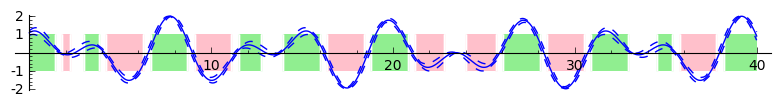

In [109]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=40,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + sigh.plot()

t = [0.00000000000000000 .. 10.000000000000000]
b = 0.?e1
t = [0.36509054541632340 .. 10.000000000000000]
b = 0.?e1
t = [0.74024120745358656 .. 10.000000000000000]
b = 0.?e1
t = [1.0251749022054170 .. 10.000000000000000]
b = 0.?e1
t = [1.2079034804965527 .. 10.000000000000000]
b = 0.?e1
t = [1.3250742365150449 .. 10.000000000000000]
b = 0.?e1
t = [1.4043319534612694 .. 10.000000000000000]
b = 0.?e1
t = [1.4607936626530344 .. 10.000000000000000]
b = 0.?e1
t = [1.5027034087530406 .. 10.000000000000000]
b = 0.?e1
t = [1.5323622589438592 .. 10.000000000000000]
b = 0.?e1
t = [1.5533552029330246 .. 10.000000000000000]
b = 0.?e1
t = [1.5684995404121846 .. 10.000000000000000]
b = 0.?e1
t = [1.5795752003097356 .. 10.000000000000000]
b = 0.?e1
t = [1.5877564659304628 .. 10.000000000000000]
b = 0.?e1
t = [1.5938442727884707 .. 10.000000000000000]
b = 0.?e1
t = [1.5983990606512259 .. 10.000000000000000]
b = 0.?e1
t = [1.6018207643632873 .. 10.000000000000000]
b = 0.?e1
t = [1.6043991133209603 .. 1

b = 0.?e1
t = [6.6983236833485326 .. 10.000000000000000]
b = 0.?e1
t = [6.7477994638543856 .. 10.000000000000000]
b = 0.?e1
t = [6.8440669489155379 .. 10.000000000000000]
b = 0.?e1
t = [7.0313288918422509 .. 10.000000000000000]
b = 0.?e1
t = [7.3898254608126086 .. 10.000000000000000]
b = 0.?e1
t = [8.0170865479600532 .. 10.000000000000000]
b = 0.?e1
t = [8.6981366939060329 .. 10.000000000000000]
b = 0.?e1
t = [8.8531161674796905 .. 10.000000000000000]
b = 0.?e1
t = [8.8617013325852731 .. 10.000000000000000]
b = 0.?e1
t = [8.8622488015273059 .. 10.000000000000000]
b = 0.?e1
t = [8.8622840705895526 .. 10.000000000000000]
b = 0.?e1
found lower bound!
t = [8.8622863440827313 .. 9.1311254925947801]
b = -2.?
t = [8.8622863440827313 .. 9.0672197079843180]
b = -3.?
t = [8.8622863440827313 .. 9.0625850503964625]
b = -3.?
t = [8.8622863440827313 .. 9.0623043381865252]
b = -3.?
t = [8.8622863440827313 .. 9.0622875656432580]
b = -3.?
found upper bound!
  I  = [6.6456768102460479 .. 8.8622863440827

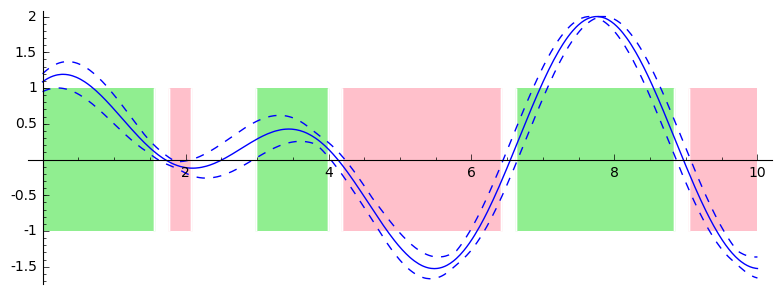

In [110]:
plot([(lambda x: RIF(h(x)).lower()), h, (lambda x: RIF(h(x)).upper())], 
         xmin=0, xmax=10,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + to_signal(h, h.derivative(), RIF(0,10)).plot()

#### Properties of uncertain trace

$\mathrel{\mathbf F_{[2,6]}} (x > 0)$

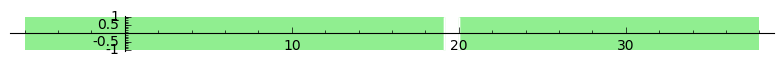

In [111]:
sigh.F(RIF(2,6)).plot()

$\mathrel{\mathbf G_{[2,3]}} (x > 0)$

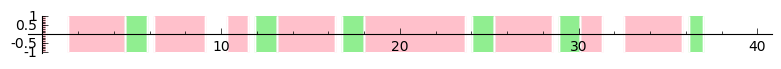

In [112]:
sigh.G(RIF(2,3)).to_domain(RIF(0,40)).plot()

$\mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)$

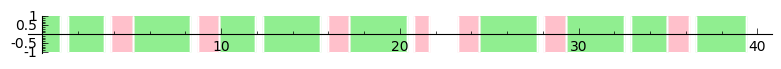

In [113]:
sigh.F(RIF(0.5,1.5)).to_domain(RIF(0,40)).plot()

${\mathrel{\mathbf G_{[2,3]}} (x > 0)} \wedge {\mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)}$

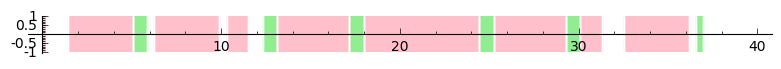

In [114]:
(sigh.G(RIF(2,3)) & sigh.F(RIF(0.5,1.5))).to_domain(RIF(0,40)).plot()

${\mathrel{\mathbf G_{[2,3]}} (x > 0)} \vee {\mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)}$

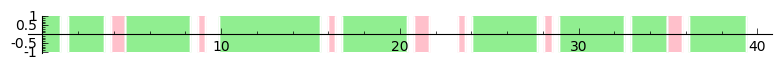

In [115]:
(sigh.G(RIF(2,3)) | sigh.F(RIF(0.5,1.5))).to_domain(RIF(0,40)).plot()

$\left(
    \mathrel{\mathbf F_{[0.5,1.5]}} (x > 0)
 \right)
 \mathrel{\mathbf U_{[0.5,2]}}
 \left(
     \mathrel{\mathbf G_{[2,3]}} (x > 0)
 \right)$

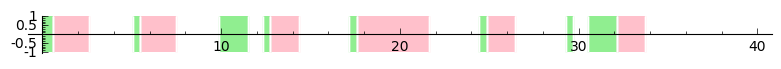

In [116]:
sigh.F(RIF(0.5,1.5)).U(RIF(0.5,2), sigh.G(RIF(2,3))).to_domain(RIF(0,40)).plot()

### Discontinuities

In [117]:
R.<x> = QQ[]

In [118]:
seq = TMSeq([(RIF(0,1), sinTM), (RIF(1,2), sinTM.mul(TM(x, RIF(0)), RIF(1,2)))])

t = [0.00000000000000000 .. 2.0000000000000000]
b = 0.?e1
t = [0.22305659186139367 .. 2.0000000000000000]
b = 0.?e1
t = [0.37737681148048890 .. 2.0000000000000000]
b = 0.?e1
t = [0.48593577726979125 .. 2.0000000000000000]
b = 0.?e1
t = [0.56387171206445707 .. 2.0000000000000000]
b = 0.?e1
t = [0.62085641541039093 .. 2.0000000000000000]
b = 0.?e1
t = [0.66315324178627454 .. 2.0000000000000000]
b = 0.?e1
t = [0.69492486506506190 .. 2.0000000000000000]
b = 0.?e1
t = [0.71901443097139117 .. 2.0000000000000000]
b = 0.?e1
t = [0.73741283829725245 .. 2.0000000000000000]
b = 0.?e1
t = [0.75154444054863056 .. 2.0000000000000000]
b = 0.?e1
t = [0.76244670643666678 .. 2.0000000000000000]
b = 0.?e1
t = [0.77088651852205702 .. 2.0000000000000000]
b = 0.?e1
t = [0.77743756493495586 .. 2.0000000000000000]
b = 0.?e1
t = [0.78253316164517650 .. 2.0000000000000000]
b = 0.?e1
t = [0.78650313146697969 .. 2.0000000000000000]
b = 0.?e1
t = [0.78960006866564802 .. 2.0000000000000000]
b = 0.?e1
t = [0.7920183

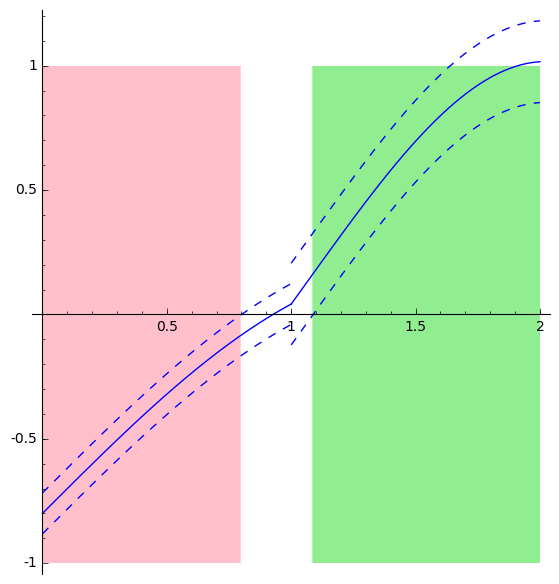

In [119]:
seq2.plot() + to_signal(seq2, seq2.map(lambda x: x.derivative()), RIF(0,2)).plot()

0 on lower boundary!
t = [0.00000000000000000 .. 0.082894013557463093]
b = 1.0?
t = [0.00000000000000000 .. 0.082290373755875571]
b = 1.0?
t = [0.00000000000000000 .. 0.082242649856629935]
b = 1.0?
found upper bound!
t = [0.083238877977612868 .. 2.0000000000000000]
b = 0.?e1
t = [0.084106942554354316 .. 2.0000000000000000]
b = 0.?e1
t = [0.085728240730594595 .. 2.0000000000000000]
b = 0.?e1
t = [0.088756217361355138 .. 2.0000000000000000]
b = 0.?e1
t = [0.094410813845127061 .. 2.0000000000000000]
b = 0.?e1
t = [0.10496857952431262 .. 2.0000000000000000]
b = 0.?e1
t = [0.12467396537926404 .. 2.0000000000000000]
b = 0.?e1
t = [0.16142480133802580 .. 2.0000000000000000]
b = 0.?e1
t = [0.22984824014533056 .. 2.0000000000000000]
b = 0.?e1
t = [0.35670429321091823 .. 2.0000000000000000]
b = 0.?e1
t = [0.58923445315639944 .. 2.0000000000000000]
b = 0.?e1
t = [1.0016091403223750 .. 2.0000000000000000]
b = 0.?e1
t = [1.5937853442959788 .. 2.0000000000000000]
b = 0.?e1
stopping since presumed co

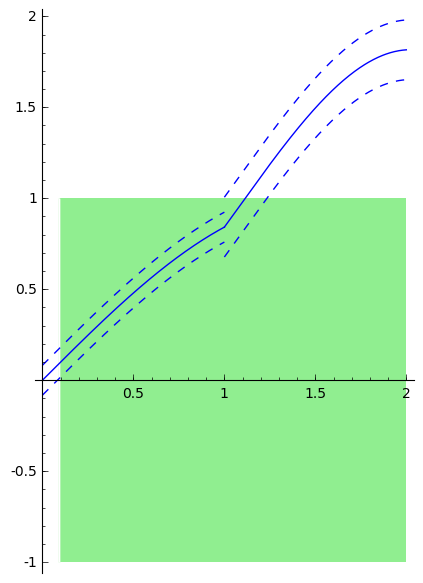

In [120]:
(seq).plot() + to_signal(seq, seq.map(lambda x: x.derivative()), RIF(0,2)).plot()

In [121]:
seq3 = seq.map(lambda x: x - 0.72)

Method can be fooled by discontinuities!

t = [0.00000000000000000 .. 2.0000000000000000]
b = 0.?e1
t = [0.19819843890790508 .. 2.0000000000000000]
b = 0.?e1
t = [0.33521370496208224 .. 2.0000000000000000]
b = 0.?e1
t = [0.43119200484833575 .. 2.0000000000000000]
b = 0.?e1
t = [0.49952088920076526 .. 2.0000000000000000]
b = 0.?e1
t = [0.54887957776491635 .. 2.0000000000000000]
b = 0.?e1
t = [0.58496193630980031 .. 2.0000000000000000]
b = 0.?e1
t = [0.61158703400989944 .. 2.0000000000000000]
b = 0.?e1
t = [0.63137617420562242 .. 2.0000000000000000]
b = 0.?e1
t = [0.64616614469796784 .. 2.0000000000000000]
b = 0.?e1
t = [0.65726663736262869 .. 2.0000000000000000]
b = 0.?e1
t = [0.66562486415731392 .. 2.0000000000000000]
b = 0.?e1
t = [0.67193369417463344 .. 2.0000000000000000]
b = 0.?e1
t = [0.67670449994970560 .. 2.0000000000000000]
b = 0.?e1
t = [0.68031734405611521 .. 2.0000000000000000]
b = 0.?e1
t = [0.68305623045711882 .. 2.0000000000000000]
b = 0.?e1
t = [0.68513427170887319 .. 2.0000000000000000]
b = 0.?e1
t = [0.6867118

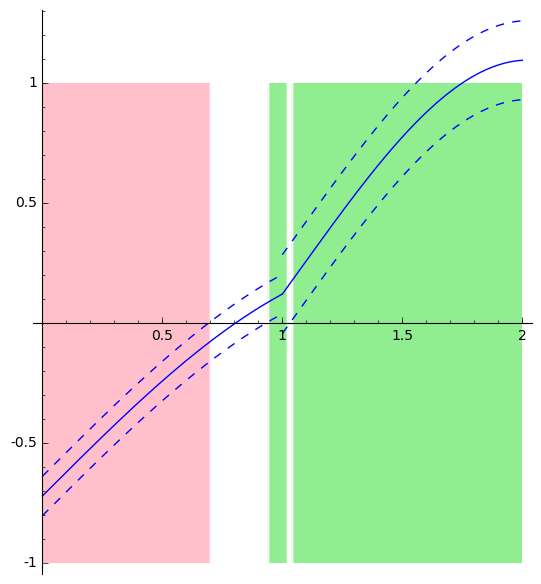

In [122]:
(seq3).plot() + to_signal(seq3, seq3.map(lambda x: x.derivative()), RIF(0,2)).plot()

t = [0.00000000000000000 .. 1.0000000000000000]
b = 1.?
t = [0.41257342565562599 .. 1.0000000000000000]
b = 1.?
t = [0.56579475429632908 .. 1.0000000000000000]
b = 1.?
t = [0.63161930407313571 .. 1.0000000000000000]
b = 1.?
t = [0.66227944056672138 .. 1.0000000000000000]
b = 1.?
t = [0.67711619466854677 .. 1.0000000000000000]
b = 1.?
t = [0.68442917971489913 .. 1.0000000000000000]
b = 1.?
t = [0.68806644488547286 .. 1.0000000000000000]
b = 1.?
t = [0.68988364602154761 .. 1.0000000000000000]
b = 1.?
t = [0.69079356565009131 .. 1.0000000000000000]
b = 1.?
t = [0.69124969653999634 .. 1.0000000000000000]
b = 1.?
t = [0.69147847740414603 .. 1.0000000000000000]
b = 1.?
t = [0.69159325897182899 .. 1.0000000000000000]
b = 1.?
t = [0.69165085412457605 .. 1.0000000000000000]
b = 1.?
t = [0.69167975629702460 .. 1.0000000000000000]
b = 1.?
t = [0.69169426038691739 .. 1.0000000000000000]
b = 1.?
found lower bound!
t = [0.69170153916077081 .. 0.93578765844527335]
b = 1.?
t = [0.69170153916077081 .. 

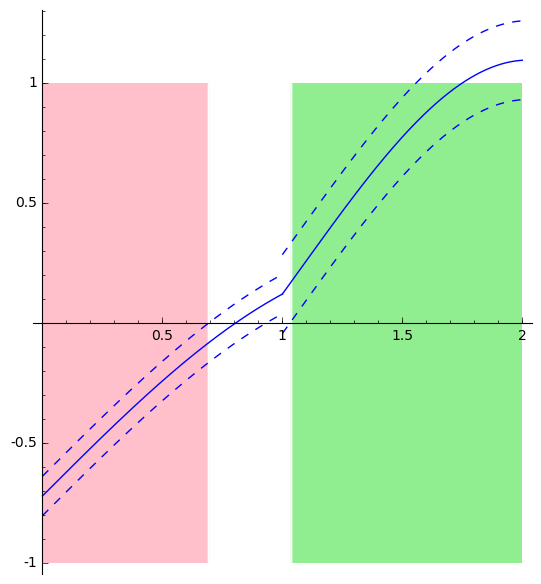

In [123]:
(seq3).plot() + to_signal(seq3, seq3.map(lambda x: x.derivative()), RIF(0,1)).plot() \
              + to_signal(seq3, seq3.map(lambda x: x.derivative()), RIF(1,2)).plot()

t = [0.00000000000000000 .. 1.0000000000000000]
b = 1.?
t = [0.58943449425880023 .. 1.0000000000000000]
b = 1.?
t = [0.67826046215408553 .. 1.0000000000000000]
b = 1.?
t = [0.69021766324743538 .. 1.0000000000000000]
b = 1.?
t = [0.69154852355063811 .. 1.0000000000000000]
b = 1.?
t = [0.69169169121608453 .. 1.0000000000000000]
b = 1.?
t = [0.69170703181905968 .. 1.0000000000000000]
b = 1.?
found lower bound!
t = [0.69170867488342058 .. 0.93579727632130694]
b = 1.?
t = [0.69170867488342058 .. 0.93239664279210699]
b = 1.?
t = [0.69170867488342058 .. 0.93134650332281977]
b = 1.?
t = [0.69170867488342058 .. 0.93102453459454793]
b = 1.?
t = [0.69170867488342058 .. 0.93092603943146213]
b = 1.?
t = [0.69170867488342058 .. 0.93089592879621653]
b = 1.?
found upper bound!
  I  = [0.00000000000000000 .. 0.69170867488342059]
f(I) = [-0.80214588661112841 .. 0.053854561494548967]
t = [0.93188672569275821 .. 1.0000000000000000]
b = 1.?
stopping since presumed converged
t = [0.93188672569275821 .. 1.00

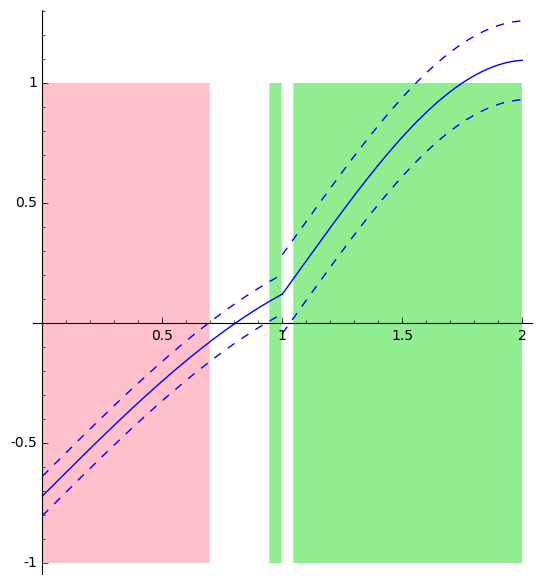

In [124]:
(seq3).plot() + seq3.to_signal().plot()

### Example: topologist's Sine curve

In [125]:
w(x) = sin(1/x) #if x > 0 else 0)

In [126]:
w(0.5)

0.909297426825682

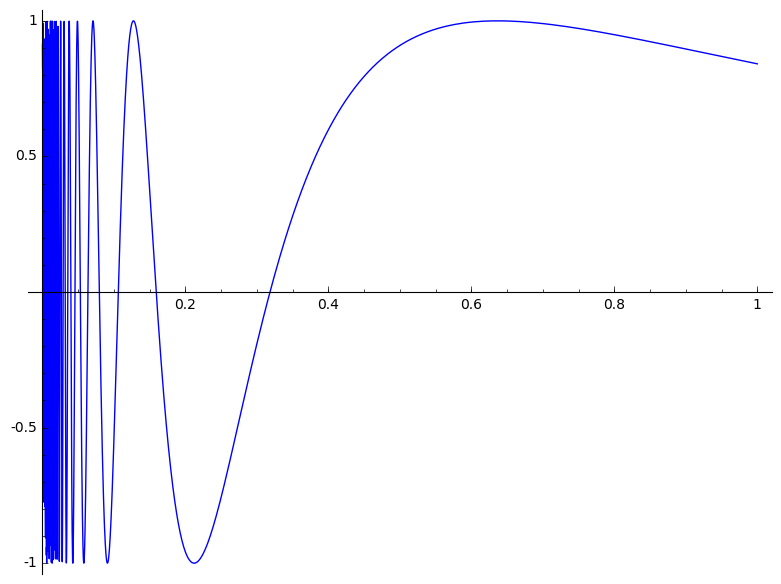

In [127]:
p = plot(w(x), (x,0,1))
p

In [128]:
tsc = to_signal(w, w.derivative(), RIF(0.00000001,1))
tsc

t = [1.0000000000000000e-8 .. 1.0000000000000000]
b = 0.?e16
found lower bound!
t = [1.0000000093163903e-8 .. 0.00010001010000009409]
b = 0.?e16
found upper bound!
  I  = [1.0000000000000000e-8 .. 1.0000000093163904e-8]
f(I) = [0.84739307245149408 .. 1.0000000000000000]
t = [0.0011000101000000297 .. 1.0000000000000000]
b = 0.?e6
found lower bound!
t = [0.0011011205534532096 .. 0.0012121317589877414]
b = 0.?e6
found upper bound!
  I  = [0.00010001010000002972 .. 0.0011011205534532097]
f(I) = [-1.0000000000000000 .. 1.0000000000000000]
t = [0.0022109826675149276 .. 1.0000000000000000]
b = 0.?e6
found lower bound!
t = [0.0022114792680782992 .. 0.0023335940607590819]
b = 0.?e6
found upper bound!
  I  = [0.0012109826675149276 .. 0.0022114792680782993]
f(I) = [-1.0000000000000000 .. 1.0000000000000000]
t = [0.0033289274552688167 .. 1.0000000000000000]
b = 0.?e5
t = [0.0033392392964949049 .. 1.0000000000000000]
b = 0.?e5
found lower bound!
t = [0.0033487296458671227 .. 0.0034822169423257936]


t = [0.065667724774861796 .. 1.0000000000000000]
b = 0.?e3
t = [0.067658199126121823 .. 1.0000000000000000]
b = 0.?e3
t = [0.071321659352815175 .. 1.0000000000000000]
b = 0.?e3
t = [0.076374146449476307 .. 1.0000000000000000]
b = 0.?e3
t = [0.079308145808143701 .. 1.0000000000000000]
b = 0.?e3
t = [0.079576478565344901 .. 1.0000000000000000]
b = 0.?e3
found lower bound!
t = [0.079577471533553018 .. 0.080473246248888534]
b = -1.6?e2
t = [0.079577471533553018 .. 0.079590328576843187]
b = -157.9?
t = [0.079577471533553018 .. 0.079577473631706697]
b = -157.91367?
found upper bound!
  I  = [0.063661977236758232 .. 0.079577471545947618]
f(I) = [6.6155686379420604e-15 .. 1.0000000000000000]
t = [0.080577471545947729 .. 1.0000000000000000]
b = 0.?e3
t = [0.081585938363106527 .. 1.0000000000000000]
b = 0.?e3
t = [0.083612409882608873 .. 1.0000000000000000]
b = 0.?e3
t = [0.087596826828511081 .. 1.0000000000000000]
b = 0.?e3
t = [0.094602004145171836 .. 1.0000000000000000]
b = 0.?e3
t = [0.10275

Signal([1.0000000000000000e-8 .. 1.0000000000000000], [([1.0000000000000000e-8 .. 1.0000000093163904e-8], True), ([0.00010001010000002972 .. 0.0011011205534532097], True), ([0.0012109826675149276 .. 0.0022114792680782993], True), ([0.0023289274552688167 .. 0.0033487296458671228], True), ([0.0034622463996617637 .. 0.0044832134034273027], True), ([0.0046132998107004177 .. 0.0056841050486393123], False), ([0.0057875306130068865 .. 0.0069197496607895310], True), ([0.0070735929360863404 .. 0.0081617918926787641], False), ([0.0081617922723588517 .. 0.0093620553041184676], True), ([0.0093620556226013725 .. 0.010610329539339620], False), ([0.010610329539585289 .. 0.011789254906462779], True), ([0.011789257710469723 .. 0.013262911923969853], False), ([0.013262912147373675 .. 0.014468631185943838], True), ([0.014468631233731384 .. 0.015915494308474905], True), ([0.015915494317603046 .. 0.017683882564144157], True), ([0.017683882567381476 .. 0.018724110951276321], False), ([0.018724110952697006 .

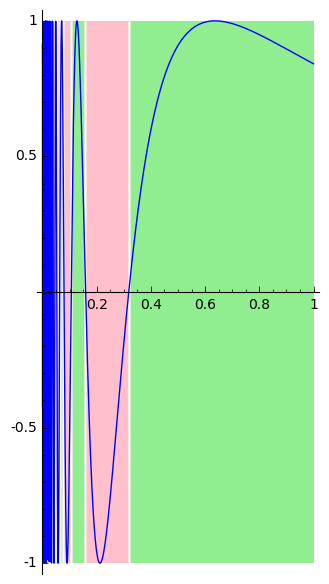

In [129]:
p + tsc.plot()

In [130]:
I = RIF(-0.005,0.005)

In [131]:
tscI = to_signal(w(x+I), w(x+I).derivative(), RIF(0.0000001,2))
tscI

0 on lower boundary!
t = [9.9999999999999995e-8 .. 0.058238501767807844]
b = [-infinity .. +infinity]
found upper bound!
0 on lower boundary!
t = [0.059238501767807844 .. 0.068799873609210333]
b = 0.?e3
t = [0.059238501767807844 .. 0.068700015156400827]
b = 0.?e3
t = [0.059238501767807844 .. 0.068672421700363265]
b = 0.?e3
found upper bound!
  I  = [0.058238501767807843 .. 0.059238501767807845]
f(I) = [-1.0000000000000000 .. 0.14050856070259977]
t = [0.069664841694556584 .. 2.0000000000000000]
b = 0.?e3
t = [0.070673458582329873 .. 2.0000000000000000]
b = 0.?e3
t = [0.072669365664730908 .. 2.0000000000000000]
b = 0.?e3
t = [0.074060682950427184 .. 2.0000000000000000]
b = 0.?e3
t = [0.074452006038195753 .. 2.0000000000000000]
b = 0.?e3
t = [0.074547718928436312 .. 2.0000000000000000]
b = 0.?e3
t = [0.074570452700129269 .. 2.0000000000000000]
b = 0.?e3
found lower bound!
t = [0.074575817744367431 .. 0.085302148378232579]
b = 0.?e3
t = [0.074575817744367431 .. 0.084754360458944425]
b = 0.

/usr/lib64/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/usr/lib64/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from ipykernel.kernelapp import IPKernelApp


Signal([9.9999999999999995e-8 .. 2.0000000000000000], [([0.058238501767807843 .. 0.059238501767807845], False), ([0.068664841694556583 .. 0.074575817744367432], True), ([0.084579806604433510 .. 0.10110262232773284], False), ([0.11110372969075793 .. 0.15415416085047895], True), ([0.16415512075263880 .. 0.31330973329277451], False), ([0.32330993939467872 .. 2.0000000000000000], True)])

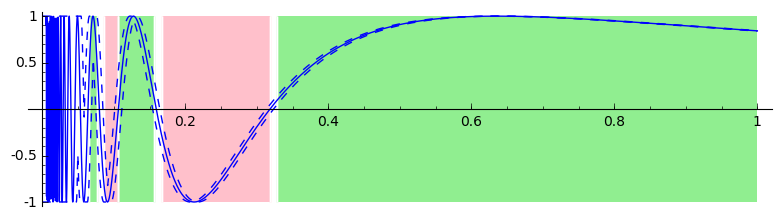

In [132]:
ar = 0.13
plot([(lambda x: RIF(w(x+I)).lower()), w(x), (lambda x: RIF(w(x+I)).upper())], 
         xmin=0, xmax=1,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--'], aspect_ratio=ar) + tscI.to_domain(RIF(0,1)).plot(aspect_ratio=ar)

#### Checking some properties

$$\mathrel {\mathbf G_{[0.13,0.14]}} \varphi$$

Signal([-0.13999990000000004 .. 1.8700000000000002], [([-0.081761498232192171 .. -0.070761498232192160], False), ([-0.055420193395566503 .. -0.028897377672267174], False), ([-0.018896270309242070 .. 0.014154160850478937], True), ([0.024155120752638786 .. 0.18330973329277451], False), ([0.19330993939467872 .. 1.8600000000000001], True)])
True


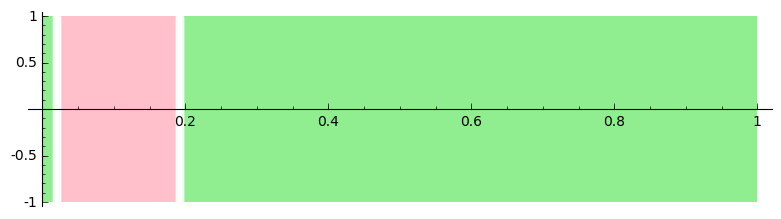

In [133]:
res = tscI.G(RIF(0.13,0.14))
print res
print res(0)
res.to_domain(RIF(0,1)).plot(aspect_ratio=ar)

$$\mathrel {\mathbf F_{[0,0.4]}} \varphi$$

In [134]:
tscI.F(RIF(0,0.4))

Signal([-0.39999990000000008 .. 2.0000000000000000], [([-0.33133515830544347 .. 0.15415416085047895], True)])

$$\mathrel {\mathbf G_{[0,0.4]}} \varphi$$

In [135]:
tscI.G(RIF(0,0.4))(0)

False

$$\mathrel {\mathbf G_{[0.2,0.3]}} \neg \varphi$$

In [136]:
(~tscI).G(RIF(0.2,0.3))(0)

True

Suppose we want to check the property
$$\mathrel {\mathbf X_{0.2}} (\neg \varphi \mathrel{\mathbf U_{[0,0.2]}} \varphi)$$
In practice, this cannot be satisfied by an uncertain trace since there will be a gap in between the $\texttt{True}$ and $\texttt{False}$ intervals. We can however loosen this to the property
$$\mathrel {\mathbf X_{0.2}} (\neg \varphi \mathrel{\mathbf U_{[0,0.2]}} {\mathrel{\mathbf F_{[0,0.1]}} \varphi})$$
which allows a delay before the signal changes truth value.

Signal([-0.19999990000000004 .. 1.8000000000000001], [])
None


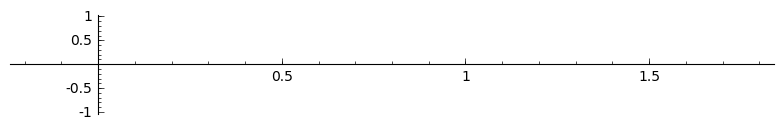

In [137]:
res = ((~tscI).U(RIF(0,0.2),tscI)).F(RIF(0.2))
print res
print res(0)
res.plot(aspect_ratio=ar)

Signal([-0.19999990000000004 .. 1.8000000000000001], [([-0.14176149823219217 .. -0.14076149823219216], True), ([-0.11542019339556651 .. -0.098897377672267181], True), ([-0.035844879247361212 .. 0.11330973329277450], True)])
True


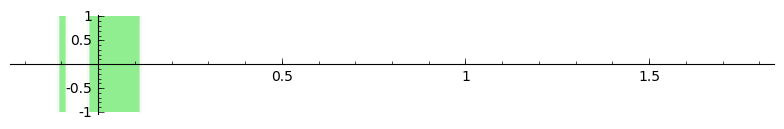

In [138]:
res = ((~tscI).U(RIF(0,0.2),tscI.F(RIF(0,0.1)))).F(RIF(0.2))
print res
print res(0)
res.plot(aspect_ratio=ar)

## Context and given

t = [0.00000000000000000 .. 9.4247779607693812]
b = 0.?e1
t = [0.36509054541632340 .. 9.4247779607693812]
b = 0.?e1
t = [0.74024120745358656 .. 9.4247779607693812]
b = 0.?e1
t = [1.0251749022054170 .. 9.4247779607693812]
b = 0.?e1
t = [1.2079034804965527 .. 9.4247779607693812]
b = 0.?e1
t = [1.3250742365150449 .. 9.4247779607693812]
b = 0.?e1
t = [1.4043319534612694 .. 9.4247779607693812]
b = 0.?e1
t = [1.4607936626530344 .. 9.4247779607693812]
b = 0.?e1
t = [1.5027034087530406 .. 9.4247779607693812]
b = 0.?e1
t = [1.5323622589438592 .. 9.4247779607693812]
b = 0.?e1
t = [1.5533552029330246 .. 9.4247779607693812]
b = 0.?e1
t = [1.5684995404121846 .. 9.4247779607693812]
b = 0.?e1
t = [1.5795752003097356 .. 9.4247779607693812]
b = 0.?e1
t = [1.5877564659304628 .. 9.4247779607693812]
b = 0.?e1
t = [1.5938442727884707 .. 9.4247779607693812]
b = 0.?e1
t = [1.5983990606512259 .. 9.4247779607693812]
b = 0.?e1
t = [1.6018207643632873 .. 9.4247779607693812]
b = 0.?e1
t = [1.6043991133209603 .. 9

t = [2.0845853505758618 .. 2.9513387272837255]
b = 0.?e1
found upper bound!
  I  = [1.8124648124294489 .. 2.0845853505758619]
f(I) = [-0.24411337554032309 .. 0.10002931460408604]
t = [2.9523324944231594 .. 9.4247779607693812]
b = 0.?e1
t = [2.9525644686858822 .. 9.4247779607693812]
b = 0.?e1
t = [2.9528499712409392 .. 9.4247779607693812]
b = 0.?e1
t = [2.9532013532532928 .. 9.4247779607693812]
b = 0.?e1
t = [2.9536338154890007 .. 9.4247779607693812]
b = 0.?e1
t = [2.9541660655646264 .. 9.4247779607693812]
b = 0.?e1
t = [2.9548211266585462 .. 9.4247779607693812]
b = 0.?e1
t = [2.9556273324963489 .. 9.4247779607693812]
b = 0.?e1
t = [2.9566195513549127 .. 9.4247779607693812]
b = 0.?e1
t = [2.9578406915153512 .. 9.4247779607693812]
b = 0.?e1
t = [2.9593435523768576 .. 9.4247779607693812]
b = 0.?e1
t = [2.9611930996930806 .. 9.4247779607693812]
b = 0.?e1
t = [2.9634692604746564 .. 9.4247779607693812]
b = 0.?e1
t = [2.9662703532941123 .. 9.4247779607693812]
b = 0.?e1
t = [2.9697172930612185

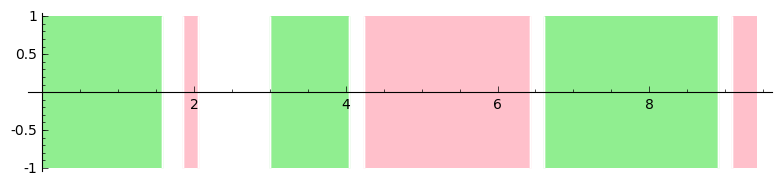

In [139]:
to_signal(h, h.derivative(), RIF(0,3*pi)).plot()

t = [0.00000000000000000 .. 9.4247779607693812]
b = 0.?e1
t = [0.36509054541632340 .. 9.4247779607693812]
b = 0.?e1
t = [0.74024120745358656 .. 9.4247779607693812]
b = 0.?e1
t = [1.0251749022054170 .. 9.4247779607693812]
b = 0.?e1
t = [1.2079034804965527 .. 9.4247779607693812]
b = 0.?e1
t = [1.3250742365150449 .. 9.4247779607693812]
b = 0.?e1
t = [1.4043319534612694 .. 9.4247779607693812]
b = 0.?e1
t = [1.4607936626530344 .. 9.4247779607693812]
b = 0.?e1
t = [1.5027034087530406 .. 9.4247779607693812]
b = 0.?e1
t = [1.5323622589438592 .. 9.4247779607693812]
b = 0.?e1
t = [1.5533552029330246 .. 9.4247779607693812]
b = 0.?e1
t = [1.5684995404121846 .. 9.4247779607693812]
b = 0.?e1
t = [1.5795752003097356 .. 9.4247779607693812]
b = 0.?e1
t = [1.5877564659304628 .. 9.4247779607693812]
b = 0.?e1
t = [1.5938442727884707 .. 9.4247779607693812]
b = 0.?e1
t = [1.5983990606512259 .. 9.4247779607693812]
b = 0.?e1
t = [1.6018207643632873 .. 9.4247779607693812]
b = 0.?e1
t = [1.6043991133209603 .. 9

f(I) = [-0.24411337554032309 .. 0.10002931460408604]
t = [2.9523324944231594 .. 9.4247779607693812]
b = 0.?e1
t = [2.9525644686858822 .. 9.4247779607693812]
b = 0.?e1
t = [2.9528499712409392 .. 9.4247779607693812]
b = 0.?e1
t = [2.9532013532532928 .. 9.4247779607693812]
b = 0.?e1
t = [2.9536338154890007 .. 9.4247779607693812]
b = 0.?e1
t = [2.9541660655646264 .. 9.4247779607693812]
b = 0.?e1
t = [2.9548211266585462 .. 9.4247779607693812]
b = 0.?e1
t = [2.9556273324963489 .. 9.4247779607693812]
b = 0.?e1
t = [2.9566195513549127 .. 9.4247779607693812]
b = 0.?e1
t = [2.9578406915153512 .. 9.4247779607693812]
b = 0.?e1
t = [2.9593435523768576 .. 9.4247779607693812]
b = 0.?e1
t = [2.9611930996930806 .. 9.4247779607693812]
b = 0.?e1
t = [2.9634692604746564 .. 9.4247779607693812]
b = 0.?e1
t = [2.9662703532941123 .. 9.4247779607693812]
b = 0.?e1
t = [2.9697172930612185 .. 9.4247779607693812]
b = 0.?e1
t = [2.9739587352655565 .. 9.4247779607693812]
b = 0.?e1
t = [2.9791773514778796 .. 9.424777

b = 0.?e1
t = [2.0717810488664869 .. 9.4247779607693812]
b = 0.?e1
t = [2.0731984741256885 .. 9.4247779607693812]
b = 0.?e1
t = [2.0744641902286842 .. 9.4247779607693812]
b = 0.?e1
t = [2.0755935363542370 .. 9.4247779607693812]
b = 0.?e1
t = [2.0766004905568049 .. 9.4247779607693812]
b = 0.?e1
t = [2.0774977493047539 .. 9.4247779607693812]
b = 0.?e1
t = [2.0782968122182827 .. 9.4247779607693812]
b = 0.?e1
t = [2.0790080688867105 .. 9.4247779607693812]
b = 0.?e1
t = [2.0796408853965333 .. 9.4247779607693812]
b = 0.?e1
t = [2.0802036888222743 .. 9.4247779607693812]
b = 0.?e1
t = [2.0807040484359764 .. 9.4247779607693812]
b = 0.?e1
t = [2.0811487527936458 .. 9.4247779607693812]
b = 0.?e1
t = [2.0815438821731890 .. 9.4247779607693812]
b = 0.?e1
t = [2.0818948760826572 .. 9.4247779607693812]
b = 0.?e1
t = [2.0822065957426429 .. 9.4247779607693812]
b = 0.?e1
t = [2.0824833815837142 .. 9.4247779607693812]
b = 0.?e1
t = [2.0827291058983599 .. 9.4247779607693812]
b = 0.?e1
t = [2.08294722085517

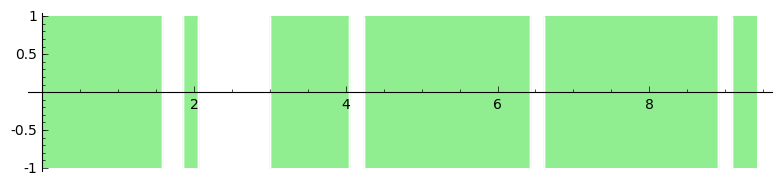

In [140]:
(to_signal(h, h.derivative(), RIF(0,3*pi))
    | ~to_signal(h, h.derivative(), RIF(0,3*pi))).plot()

In [141]:
w = lambda x: RIF(h(x)).max(RIF(-h(x)))

In [142]:
w(3)

1.?

In [143]:
w(0)

1.?

In [144]:
sigor = to_signal((lambda x: max(RIF(h(x)), -RIF(h(x)))),
                  (lambda x: h.derivative(x)
                             if   RIF(h(x)) > 0
                             else -h.derivative()(x)),
                  RIF(0,3*pi))
sigor

t = [0.00000000000000000 .. 9.4247779607693812]
b = 0.?e1
t = [0.36509054541632340 .. 9.4247779607693812]
b = 0.?e1
t = [0.74024120745358656 .. 9.4247779607693812]
b = 0.?e1
t = [1.0251749022054170 .. 9.4247779607693812]
b = 0.?e1
t = [1.2079034804965527 .. 9.4247779607693812]
b = 0.?e1
t = [1.3250742365150449 .. 9.4247779607693812]
b = 0.?e1
t = [1.4043319534612694 .. 9.4247779607693812]
b = 0.?e1
t = [1.4607936626530344 .. 9.4247779607693812]
b = 0.?e1
t = [1.5027034087530406 .. 9.4247779607693812]
b = 0.?e1
t = [1.5323622589438592 .. 9.4247779607693812]
b = 0.?e1
t = [1.5533552029330246 .. 9.4247779607693812]
b = 0.?e1
t = [1.5684995404121846 .. 9.4247779607693812]
b = 0.?e1
t = [1.5795752003097356 .. 9.4247779607693812]
b = 0.?e1
t = [1.5877564659304628 .. 9.4247779607693812]
b = 0.?e1
t = [1.5938442727884707 .. 9.4247779607693812]
b = 0.?e1
t = [1.5983990606512259 .. 9.4247779607693812]
b = 0.?e1
t = [1.6018207643632873 .. 9.4247779607693812]
b = 0.?e1
t = [1.6043991133209603 .. 9

Signal([0.00000000000000000 .. 9.4247779607693812], [([0.00000000000000000 .. 1.6124318328845884], True), ([1.8124648124294489 .. 2.0845853505758623], True), ([2.9513274549901482 .. 4.0290590739976393], True), ([4.2290692261212265 .. 9.4247779607693812], True)])

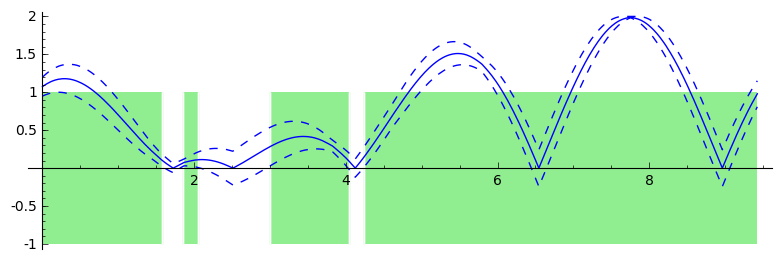

In [145]:
plot([(lambda x: RIF(w(x)).lower()),
      (lambda x: RIF(w(x)).center()),
      (lambda x: RIF(w(x)).upper())], 
         xmin=0, xmax=3*pi,
         color=['blue', 'blue', 'blue'],
         linestyle=['--', '-', '--']) + sigor.plot()

### Context

In [146]:
load('interval_signals.py')

In [147]:
RIF(0,1).absolute_diameter()

1.00000000000000

In [148]:
var('t')

t

In [149]:
x = function('x')(t)
x

x(t)

In [150]:
y(t) = desolve(diff(x,t) == -x, x, [0,1])
y

t |--> e^(-t)

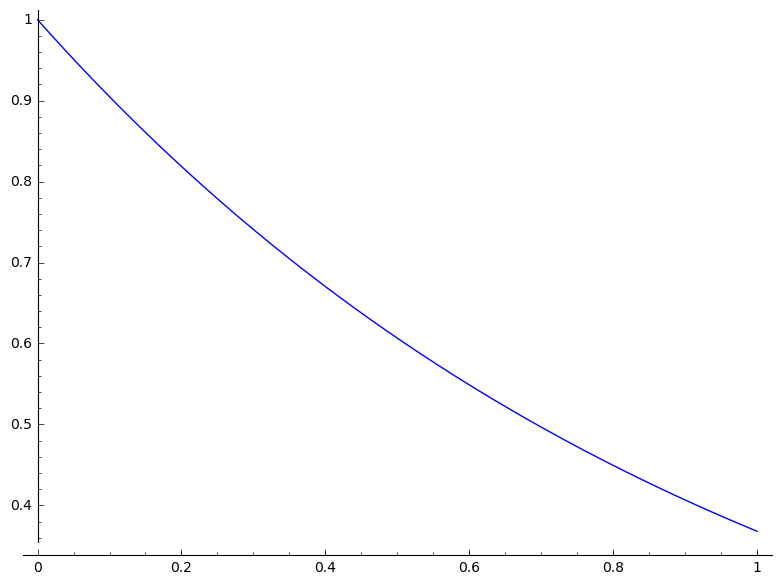

In [151]:
plot(y, (t, 0, 1))

In [152]:
def g(s, fn = None):
    w(t) = y(t - ln(s))
    return w if fn is None else fn(w)

In [153]:
g(y(0.4))

t |--> e^(-t - 0.400000000000000)

In [154]:
def w(t):
    if t < 0.4:
        return y(t)
    else:
        return g(1 + y(0.4))(t)

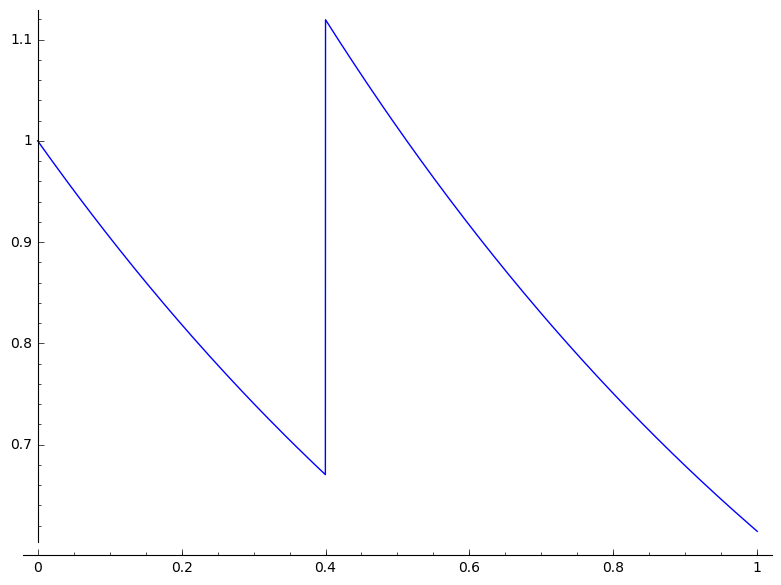

In [155]:
plot(w, (0, 1))

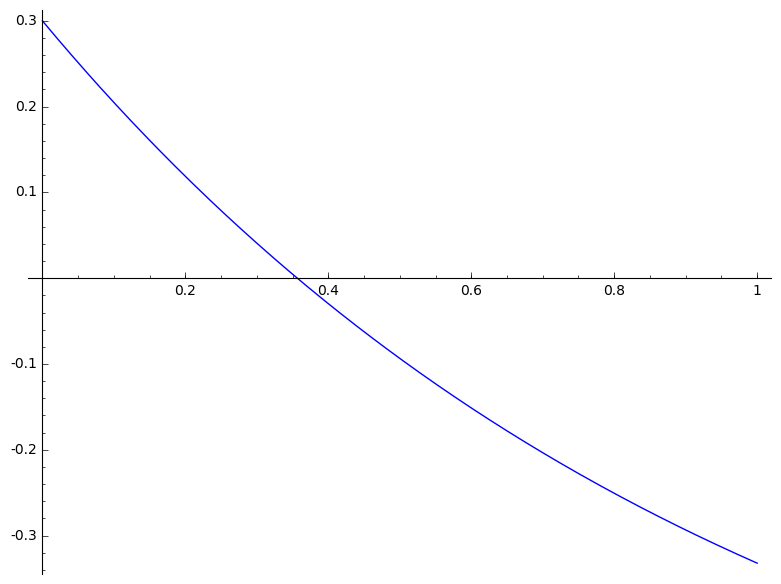

In [156]:
plot((lambda t: g(y(t), (lambda s: s - 0.7))(0)), (0,1))

In [157]:
load('interval_signals.py')

t = [0.00000000000000000 .. 1.0000000000000000]
b = -1.?
t = [0.19999999906867738 .. 0.54365637006234447]
b = -1.?
t = [0.22287779342436633 .. 0.23225983987596458]
b = -0.80?
t = [0.22314351600365589 .. 0.22314602075734070]
b = -0.80000?
found lower bound!
0 on upper boundary!
  I  = [0.00000000000000000 .. 0.22314355131420896]
f(I) = [-3.9115548577939308e-9 .. 0.20000000279396768]
t = [0.22414355131429752 .. 1.0000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414355131429752 .. 1.0000000000000000], fprime(t) = [-0.79920040303841234 .. -0.36787943867966532]


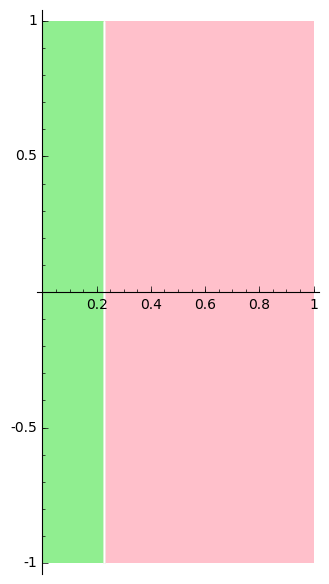

In [158]:
sig = to_signal(lambda t: y(t) - 0.8, y.derivative(), RIF(0,1))
sig.plot()

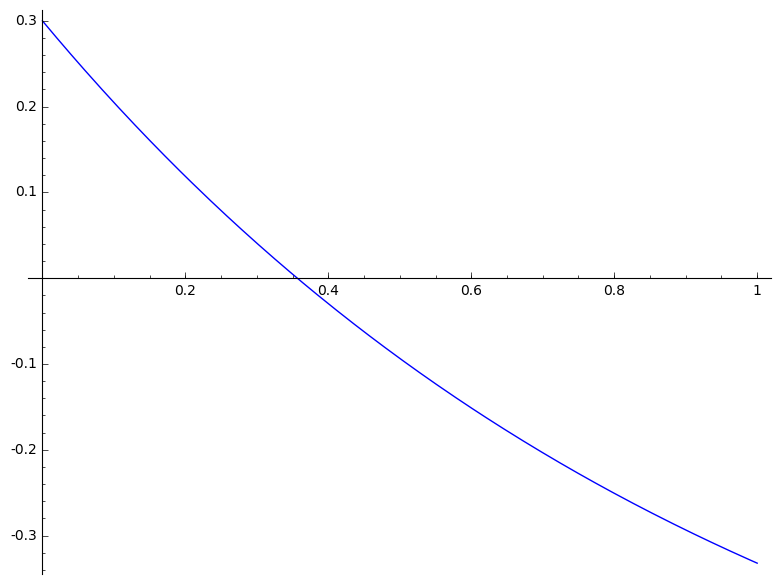

In [159]:
plot((lambda t: g(y(t) + 0.5, (lambda s: s - 1.2))(0)),
     (0,1))

### Simple context

In [160]:
csig = C(RIF(0,1),
         (lambda x: x + 0.5),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10))(0)),
         y,
         g,
         0.001)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656918764283]
b = -1.?
t = [0.00000000000000000 .. 0.22319218180236586]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244546307]
b = -1.?
found upper bound!
t = [0.22414550105913116 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105913116 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.35644531250000000], True), ([0.35742187500000000 .. 1.0000000000000000], False)])

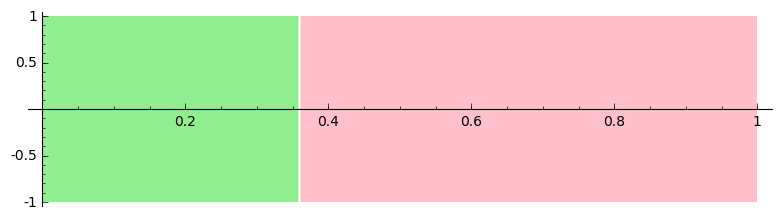

In [161]:
csig.plot(aspect_ratio=ar)

### Temporal contexts

In [162]:
csig = C(RIF(0,1),
         (lambda x: x + 0.5),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).G(RIF(0,0.1))(0)),
         y,
         g,
         0.001)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656918764283]
b = -1.?
t = [0.00000000000000000 .. 0.22319218180236586]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244546307]
b = -1.?
found upper bound!
t = [0.22414550105913116 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105913116 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

C || f(I) = [1.3257970381528139 .. 1.3290291186422110]
h  = t |--> e^(-t + 0.29?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.094653330359099521 .. 10.000000000000000]
b = -1.?
t = [0.099667359606792349 .. 10.000000000000000]
b = -1.?
t = [0.099692196725497922 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.099692258043299883 .. 0.10301604315426987]
b = -1.20?
t = [0.099692258043299883 .. 0.10212968899211273]
b = -1.20?
found upper bound!
  I  = [0.00000000000000000 .. 0.099692258043299884]
f(I) = [-7.4505801528346183e-10 .. 0.12902912050485616]
t = [0.10312713965784159 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10312713965784159 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000060188584029674530]
bisecting [0.18750000000000000 .. 0.19140625000000000] -> [0.18750000000000000 .. 0.18945312500000000], [0.18945312500000000 .. 0.19140625000000000]
I  = [0.18750000000000000 .. 0.18945312500000000]
C || f(I) = [1.32

b = -2.?
found upper bound!
t = [0.064601264061761615 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.064601264061761615 .. 10.000000000000000], fprime(t) = [-1.1988005368039012 .. -0.000050234608352184295]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943867966532 .. 1.1065306612290442]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1065306821838022 .. -0.000039399601519107818]
returning res = False


Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.19042968750000000], True), ([0.19140625000000000 .. 1.0000000000000000], False)])

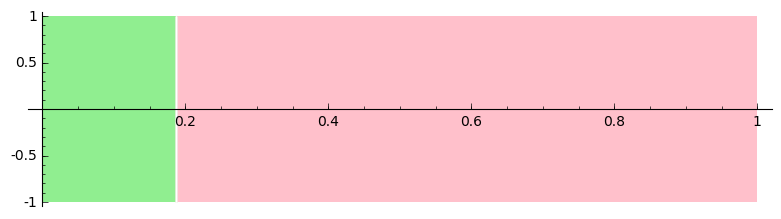

In [163]:
csig.plot(aspect_ratio=ar)

In [164]:
csig = C(RIF(0,1),
         (lambda x: x + 0.5),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.001)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656918764283]
b = -1.?
t = [0.00000000000000000 .. 0.22319218180236586]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244546307]
b = -1.?
found upper bound!
t = [0.22414550105913116 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105913116 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306579694151 .. 1.2788007836788893]
h  = t |--> e^(-t + 0.2?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.063891780303481194]
b = -2.?
t = [0.00000000000000000 .. 0.063619141540639482]
b = -2.?
t = [0.00000000000000000 .. 0.063602301712363072]
b = -2.?
found upper bound!
t = [0.064601264061761615 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.064601264061761615 .. 10.000000000000000], fprime(t) = [-1.1988005368039012 .. -0.000050234608352184295]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943867966532 .. 1.1065306612290442]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1065306821838022 .. -0.000039399601519107818]
returning res = False


Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.19042968750000000], True), ([0.19140625000000000 .. 1.0000000000000000], False)])

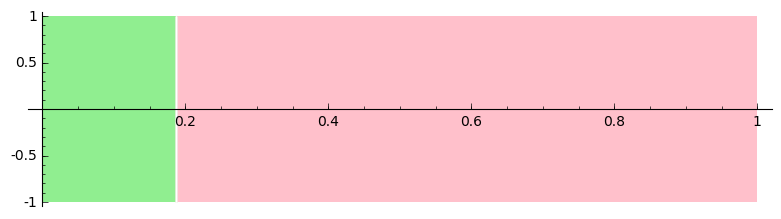

In [165]:
csig.plot(aspect_ratio=ar)

### Uncertain contexts

In [166]:
csig = C(RIF(0,1),
         (lambda x: x + RIF(0.4,0.6)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943821400406 .. 1.6000000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.29054522588902532]
b = -1.?
t = [0.00000000000000000 .. 0.28840093611843904]
b = -1.?
t = [0.00000000000000000 .. 0.28786198568501587]
b = -1.?
t = [0.00000000000000000 .. 0.28772706742918558]
b = -1.?
t = [0.00000000000000000 .. 0.28769332514687385]
b = -1.?
found upper bound!
t = [0.28868488980911677 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28868488980911677 .. 10.000000000000000], fprime(t) = [-1.1987972492352129 .. -0.000034860335290431976]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306561067699 .. 1.6000000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.2905452258

b = -1.?
stopping since presumed converged
t = [0.25008041664194652 .. 10.000000000000000], fprime(t) = [-1.1987997135147453 .. -0.000060475431382656097]
returning res = True
I  = [0.070312500000000000 .. 0.078125000000000000]
C || f(I) = [1.3248488117009400 .. 1.5321024930104615]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.081488547059572966 .. 10.000000000000000]
b = -1.?
t = [0.096479618164086025 .. 10.000000000000000]
b = -1.?
t = [0.098636292894597327 .. 10.000000000000000]
b = -1.?
t = [0.098930677659537016 .. 10.000000000000000]
b = -1.?
t = [0.098970550292408421 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.098975945491786315 .. 0.24642997558878971]
b = -2.?
t = [0.098975945491786315 .. 0.24460684521914828]
b = -2.?
t = [0.098975945491786315 .. 0.24435833209917072]
b = -2.?
t = [0.098975945491786315 .. 0.24432468050842185]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.098975945491786316]
f(I) = [1.012533903

returning res = None
I  = [0.10937500000000000 .. 0.12500000000000000]
C || f(I) = [1.2824969008564948 .. 1.4963942071422936]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.055130456866413761 .. 10.000000000000000]
b = -1.?
t = [0.064808889000860514 .. 10.000000000000000]
b = -1.?
t = [0.066246197699288314 .. 10.000000000000000]
b = -1.?
t = [0.066452829968070378 .. 10.000000000000000]
b = -1.?
t = [0.066482390995532603 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.066486616898948872 .. 0.22081176489099217]
b = -2.?
t = [0.066486616898948872 .. 0.22074751481623406]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.066486616898948873]
f(I) = [8.4675848488480198e-7 .. 0.29639420956373220]
t = [0.22173832836618326 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22173832836618326 .. 10.000000000000000], fprime(t) = [-1.1987987859174610 .. -0.000058223493397235870]
bisecting [0.10937500000000000 .. 0.1

b = -1.?
t = [0.043988967445609282 .. 10.000000000000000]
b = -1.?
t = [0.044928725497992830 .. 10.000000000000000]
b = -1.?
t = [0.045065811308887544 .. 10.000000000000000]
b = -1.?
t = [0.045085745359728361 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.045088642146824092 .. 0.20319101743648633]
b = -2.?
t = [0.045088642146824092 .. 0.20228847193988867]
b = -2.?
t = [0.045088642146824092 .. 0.20215683277364547]
b = -2.?
t = [0.045088642146824092 .. 0.20213769184821188]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.045088642146824093]
f(I) = [5.9157609944016087e-7 .. 0.26881505846977239]
t = [0.20313490940684597 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.20313490940684597 .. 10.000000000000000], fprime(t) = [-1.1988000543788076 .. -0.000056990422308444976]
bisecting [0.14062500000000000 .. 0.15625000000000000] -> [0.14062500000000000 .. 0.14843750000000000], [0.14843750000000000 .. 0.15625000000000000]
I  = [0.14062500000000000 .

stopping since presumed converged
t = [0.18476831555419082 .. 10.000000000000000], fprime(t) = [-1.1988002760335804 .. -0.000056090764701366424]
returning res = None
I  = [0.17968750000000000 .. 0.18750000000000000]
C || f(I) = [1.2290291167795657 .. 1.4355312747880818]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.020221860229620320 .. 10.000000000000000]
b = -1.?
t = [0.023367638820793287 .. 10.000000000000000]
b = -1.?
t = [0.023825832653084404 .. 10.000000000000000]
b = -1.?
t = [0.023891863652167968 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.023901364783207042 .. 0.17958974679358362]
b = -2.?
t = [0.023901364783207042 .. 0.17926764347808580]
b = -2.?
t = [0.023901364783207042 .. 0.17922124781328791]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.023901364783207043]
f(I) = [1.9159168005433713e-6 .. 0.23553127720952039]
t = [0.18021457346300320 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t

bisecting [0.21875000000000000 .. 0.25000000000000000] -> [0.21875000000000000 .. 0.23437500000000000], [0.23437500000000000 .. 0.25000000000000000]
I  = [0.21875000000000000 .. 0.23437500000000000]
C || f(I) = [1.1910651089623569 .. 1.4035225747153164]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.15708935420416790]
b = -2.?
t = [0.00000000000000000 .. 0.15672545427224849]
b = -2.?
t = [0.00000000000000000 .. 0.15667261041293460]
b = -2.?
found upper bound!
t = [0.15766494575475947 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.15766494575475947 .. 10.000000000000000], fprime(t) = [-1.1987990615889431 .. -0.000054071657359600067]
bisecting [0.21875000000000000 .. 0.23437500000000000] -> [0.21875000000000000 .. 0.22656250000000000], [0.22656250000000000 .. 0.23437500000000000]
I  = [0.21875000000000000 .. 0.22656250000000000]
C || f(I) = [1.1972695101052521 .. 1.4035225747153164]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [

returning res = None
I  = [0.25781250000000000 .. 0.26562500000000000]
C || f(I) = [1.1667265944182871 .. 1.3727401079609992]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.13536155076810497]
b = -2.?
t = [0.00000000000000000 .. 0.13459761665220088]
b = -2.?
t = [0.00000000000000000 .. 0.13450115678695022]
b = -2.?
t = [0.00000000000000000 .. 0.13448901351498461]
b = -2.?
found upper bound!
t = [0.13548748512408223 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13548748512408223 .. 10.000000000000000], fprime(t) = [-1.1988003486767412 .. -0.000052967108786106109]
returning res = None
I  = [0.26562500000000000 .. 0.28125000000000000]
C || f(I) = [1.1548396000638603 .. 1.3667265972122551]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.13108648906300686]
b = -2.?
t = [0.00000000000000000 .. 0.13021811917999096]
b = -2.?
t = [0.00000000000000000 .. 0.13011176444360651]
b = -2.?
t = [0.00000000000000000 .. 0

returning res = False
I  = [0.32812500000000000 .. 0.34375000000000000]
C || f(I) = [1.1091061808168887 .. 1.3202729806303979]
h  = t |--> e^(-t + 0.2?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.095722052622227383]
b = -2.?
t = [0.00000000000000000 .. 0.095535665223836275]
b = -2.?
t = [0.00000000000000000 .. 0.095518667304375791]
b = -2.?
found upper bound!
t = [0.096517117678306355 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.096517117678306355 .. 10.000000000000000], fprime(t) = [-1.1988004287704826 .. -0.000050351954996585845]
returning res = False
I  = [0.34375000000000000 .. 0.37500000000000000]
C || f(I) = [1.0872892770916222 .. 1.3091061836108567]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.087632541843019274]
b = -1.?
t = [0.00000000000000000 .. 0.087074014306352296]
b = -1.?
t = [0.00000000000000000 .. 0.087027295584968592]
b = -1.?
found upper bound!
t = [0.088023401421482641 .. 10.000000000000000]
b = -1.?

Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.070312500000000000], True), ([0.32031250000000000 .. 1.0000000000000000], False)])

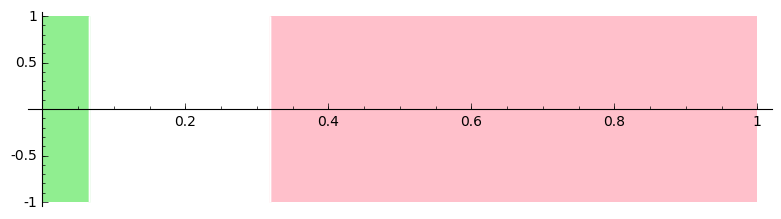

In [167]:
csig.plot(aspect_ratio=ar)

In [168]:
csig = C(RIF(0,1),
         (lambda x: x + RIF(0.5,0.6)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.86787943821400403 .. 1.6000000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.29054522588902532]
b = -1.?
t = [0.00000000000000000 .. 0.28840093611344648]
b = -1.?
t = [0.00000000000000000 .. 0.28786198567908217]
b = -1.?
t = [0.00000000000000000 .. 0.28772706742301630]
b = -1.?
t = [0.00000000000000000 .. 0.28769332514064567]
b = -1.?
found upper bound!
t = [0.28868488922080709 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28868488922080709 .. 10.000000000000000], fprime(t) = [-1.1987972492352129 .. -0.000039399601519107818]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1065306561067700 .. 1.6000000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.2905452258

b = -1.?
stopping since presumed converged
t = [0.17114903405224143 .. 10.000000000000000], fprime(t) = [-1.1988004026934505 .. -0.000059752725064754486]
returning res = None
I  = [0.20312500000000000 .. 0.21875000000000000]
C || f(I) = [1.3035225719213485 .. 1.4161762133240701]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.073100059963462221 .. 10.000000000000000]
b = -1.?
t = [0.081938474792192003 .. 10.000000000000000]
b = -1.?
t = [0.082683956994286017 .. 10.000000000000000]
b = -1.?
t = [0.082743557745584436 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.082748301961628634 .. 0.16709049960060716]
b = -2.?
t = [0.082748301961628634 .. 0.16575532003846938]
b = -2.?
t = [0.082748301961628634 .. 0.16564814476503989]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.082748301961628635]
f(I) = [4.9099326138168919e-7 .. 0.21617621481418615]
t = [0.16663961325070839 .. 10.000000000000000]
b = -1.?
stopping since presumed co

t = [0.068366072548413925 .. 0.14883478535232206]
b = -1.2?
t = [0.068366072548413925 .. 0.14783163378740189]
b = -1.2?
t = [0.068366072548413925 .. 0.14775453899940927]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.068366072548413926]
f(I) = [3.1217932705551731e-7 .. 0.19106511324644094]
t = [0.14874865144510696 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.14874865144510696 .. 10.000000000000000], fprime(t) = [-1.1988000357523561 .. -0.000058333389461040496]
returning res = None
I  = [0.24218750000000000 .. 0.25000000000000000]
C || f(I) = [1.2788007808849215 .. 1.3849089941009881]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.056899605258782647 .. 10.000000000000000]
b = -1.?
t = [0.063067041432048859 .. 10.000000000000000]
b = -1.?
t = [0.063560133298509541 .. 10.000000000000000]
b = -1.?
t = [0.063598042813446609 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.063600948919412411 .. 0.1

t = [0.13109747627770393 .. 10.000000000000000], fprime(t) = [-1.1988000264391304 .. -0.000057236291468143463]
returning res = None
I  = [0.27343750000000000 .. 0.28125000000000000]
C || f(I) = [1.2548396000638604 .. 1.3607598835602404]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.040300714877316040 .. 10.000000000000000]
b = -1.?
t = [0.044335980288523153 .. 10.000000000000000]
b = -1.?
t = [0.044658879458623915 .. 10.000000000000000]
b = -1.?
t = [0.044684069091983247 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.044686030940152665 .. 0.12659751285125221]
b = -2.?
t = [0.044686030940152665 .. 0.12579025009730735]
b = -2.?
t = [0.044686030940152665 .. 0.12572706260171318]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.044686030940152666]
f(I) = [1.9855797295242894e-7 .. 0.16075988411903386]
t = [0.12672214093815339 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.12672214093815339 .. 10.0000

h  = t |--> e^(-t + 0.2?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.0068384425177122239 .. 10.000000000000000]
b = -1.?
t = [0.0074932293310476100 .. 10.000000000000000]
b = -1.?
t = [0.0075537035255197875 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.0075592700597096398 .. 0.10514527019244479]
b = -2.?
t = [0.0075592700597096398 .. 0.10417072889611039]
b = -2.?
t = [0.0075592700597096398 .. 0.10408055070812416]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.0075592700597096399]
f(I) = [6.7539513115555394e-7 .. 0.13161563239991670]
t = [0.10507225018923450 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10507225018923450 .. 10.000000000000000], fprime(t) = [-1.1987996073439718 .. -0.000054891221225261688]
bisecting [0.31250000000000000 .. 0.34375000000000000] -> [0.31250000000000000 .. 0.32812500000000000], [0.32812500000000000 .. 0.34375000000000000]
I  = [0.31250000000000000 .. 0.32812500000000000]
C || f(I) = [

Signal([0.00000000000000000 .. 1.0000000000000000], [([0.00000000000000000 .. 0.18750000000000000], True), ([0.32031250000000000 .. 1.0000000000000000], False)])

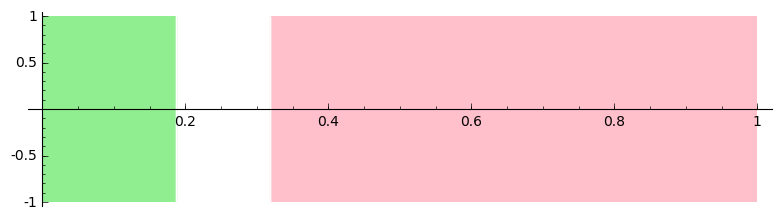

In [169]:
csig.plot(aspect_ratio=ar)

### Splitting uncertain contexts

In [170]:
csig1 = C(RIF(0,1),
         (lambda x: x + RIF(0.4,0.5)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig2 = C(RIF(0,1),
         (lambda x: x + RIF(0.5,0.6)),
         (lambda f: to_signal((lambda t: f(t) - 1.2),
                              f.derivative(),
                              RIF(0,10)).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.01)
csig = csig1 & csig2

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943821400406 .. 1.5000000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.22338656980912625]
b = -1.?
t = [0.00000000000000000 .. 0.22319218242384928]
b = -1.?
t = [0.00000000000000000 .. 0.22315328244604063]
b = -1.?
found upper bound!
t = [0.22414550105970390 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.22414550105970390 .. 10.000000000000000], fprime(t) = [-1.1987982848659158 .. -0.000034860335290431976]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306561067699 .. 1.5000000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.22435568284070104]
b = -1.?
t = [0.00000000000000000 .. 0.2233865679

b = -1.?
t = [0.087281210406920550 .. 10.000000000000000]
b = -1.?
t = [0.088033272583459082 .. 10.000000000000000]
b = -1.?
t = [0.088090416001036925 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.088094735872758594 .. 0.16820838280655537]
b = -1.2?
t = [0.088094735872758594 .. 0.16679671245994646]
b = -1.2?
t = [0.088094735872758594 .. 0.16668894994741740]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.088094735872758595]
f(I) = [4.2393803600937474e-7 .. 0.21765158623456960]
t = [0.16768079917824177 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.16768079917824177 .. 10.000000000000000], fprime(t) = [-1.1987998122349382 .. -0.000059495680034160614]
returning res = None
I  = [0.093750000000000000 .. 0.12500000000000000]
C || f(I) = [1.2824969008564948 .. 1.4105103621259332]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.058487266951488640 .. 10.000000000000000]
b = -1.?
t = [0.065732243640118

t = [0.061117792560306263 .. 0.14168207222737853]
b = -2.?
t = [0.061117792560306263 .. 0.14157835473540609]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.061117792560306264]
f(I) = [2.8610229496628392e-7 .. 0.18249690644443040]
t = [0.14257033087819742 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.14257033087819742 .. 10.000000000000000], fprime(t) = [-1.1987998122349382 .. -0.000057912431657314300]
returning res = None
I  = [0.13281250000000000 .. 0.14062500000000000]
C || f(I) = [1.2688150541856884 .. 1.3756292574107647]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.050024415250004686 .. 10.000000000000000]
b = -1.?
t = [0.055301224855153367 .. 10.000000000000000]
b = -1.?
t = [0.055726011149206423 .. 10.000000000000000]
b = -1.?
t = [0.055759091207080335 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.055761660491863616 .. 0.13723262225547720]
b = -2.?
t = [0.055761660491863616 .. 0.1366

found upper bound!
  I  = [0.00000000000000000 .. 0.029179388969001349]
f(I) = [1.3150274758011448e-7 .. 0.14208442829549318]
t = [0.11290296178372363 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11290296178372363 .. 10.000000000000000], fprime(t) = [-1.1987999370321632 .. -0.000056090764701366424]
returning res = None
I  = [0.17968750000000000 .. 0.18750000000000000]
C || f(I) = [1.2290291167795657 .. 1.3355312747880817]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.021736003857770608 .. 10.000000000000000]
b = -1.?
t = [0.023727998125663195 .. 10.000000000000000]
b = -1.?
t = [0.023888995561976683 .. 10.000000000000000]
b = -1.?
t = [0.023901847765513444 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.023902872801063308 .. 0.10760024406394757]
b = -2.?
t = [0.023902872801063308 .. 0.10705503714529444]
b = -2.?
t = [0.023902872801063308 .. 0.10701139823983326]
b = -2.?
found upper bound!
  I  = [0.000000

C || f(I) = [1.2788007790222764 .. 1.6000000027939679]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.049250483273317893 .. 10.000000000000000]
b = -1.?
t = [0.060638382210424272 .. 10.000000000000000]
b = -1.?
t = [0.063002901647810818 .. 10.000000000000000]
b = -1.?
t = [0.063480938322452148 .. 10.000000000000000]
b = -1.?
t = [0.063577041754954488 .. 10.000000000000000]
b = -1.?
t = [0.063596339566535528 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.063600214685944511 .. 0.28935932058231656]
b = -1.?
t = [0.063600214685944511 .. 0.28801990632814706]
b = -1.?
t = [0.063600214685944511 .. 0.28774994098348739]
b = -1.?
t = [0.063600214685944511 .. 0.28769570212708357]
b = -1.?
t = [0.063600214685944511 .. 0.28768481103409200]
b = -1.?
found upper bound!
  I  = [0.00000000000000000 .. 0.063600214685944512]
f(I) = [1.1671334505525265e-6 .. 0.40000000521540647]
t = [0.28868262522303028 .. 10.000000000000000]
b = -1.?
stopping since pre

t = [0.082748301961628634 .. 0.16709049960060716]
b = -2.?
t = [0.082748301961628634 .. 0.16575532003846938]
b = -2.?
t = [0.082748301961628634 .. 0.16564814476503989]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.082748301961628635]
f(I) = [4.9099326138168919e-7 .. 0.21617621481418615]
t = [0.16663961325070839 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.16663961325070839 .. 10.000000000000000], fprime(t) = [-1.1987997321411968 .. -0.000059177167713642120]
bisecting [0.20312500000000000 .. 0.21875000000000000] -> [0.20312500000000000 .. 0.21093750000000000], [0.21093750000000000 .. 0.21875000000000000]
I  = [0.20312500000000000 .. 0.21093750000000000]
C || f(I) = [1.3098246771842241 .. 1.4161762133240701]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.077550146007453121 .. 10.000000000000000]
b = -1.?
t = [0.086772846912467241 .. 10.000000000000000]
b = -1.?
t = [0.087511444176894728 .. 10.0000000000

C || f(I) = [1.1872892770916223 .. 1.3788007836788894]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.13976615111792926]
b = -2.?
t = [0.00000000000000000 .. 0.13900618557522385]
b = -2.?
t = [0.00000000000000000 .. 0.13890730738126564]
b = -2.?
t = [0.00000000000000000 .. 0.13889447988585066]
b = -2.?
found upper bound!
t = [0.13989281636689898 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13989281636689898 .. 10.000000000000000], fprime(t) = [-1.1988003207370639 .. -0.000053900294005870819]
bisecting [0.25000000000000000 .. 0.37500000000000000] -> [0.25000000000000000 .. 0.31250000000000000], [0.31250000000000000 .. 0.37500000000000000]
I  = [0.25000000000000000 .. 0.31250000000000000]
C || f(I) = [1.2316156271845102 .. 1.3788007836788894]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.022929797624229548 .. 10.000000000000000]
b = -1.?
t = [0.025672744063338758 .. 10.000000000000000]
b 

h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.031839114269236468 .. 10.000000000000000]
b = -1.?
t = [0.035024149469842592 .. 10.000000000000000]
b = -1.?
t = [0.035292248662540159 .. 10.000000000000000]
b = -1.?
t = [0.035314391477044175 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.035316216765800816 .. 0.12141369912013338]
b = -2.?
t = [0.035316216765800816 .. 0.12136582166220244]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.035316216765800817]
f(I) = [1.9669532780319798e-7 .. 0.15483960434794431]
t = [0.12236187170498438 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.12236187170498438 .. 10.000000000000000], fprime(t) = [-1.1988001884892583 .. -0.000056437216699123382]
bisecting [0.28125000000000000 .. 0.29687500000000000] -> [0.28125000000000000 .. 0.28906250000000000], [0.28906250000000000 .. 0.29687500000000000]
I  = [0.28125000000000000 .. 0.28906250000000000]
C || f(I) = [1.248965

returning res = False
I  = [0.32812500000000000 .. 0.34375000000000000]
C || f(I) = [1.2091061808168888 .. 1.3202729806303979]
h  = t |--> e^(-t + 0.2?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.0068971925643894448 .. 10.000000000000000]
b = -1.?
t = [0.0075038381303340140 .. 10.000000000000000]
b = -1.?
t = [0.0075551170448132322 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.0075594364213234198 .. 0.096335732616920855]
b = -2.?
t = [0.0075594364213234198 .. 0.095586210504213676]
b = -2.?
t = [0.0075594364213234198 .. 0.095522796448676742]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.0075594364213234199]
f(I) = [4.7609210018784153e-7 .. 0.12027298212051397]
t = [0.096517453851741305 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.096517453851741305 .. 10.000000000000000], fprime(t) = [-1.1988000357523561 .. -0.000054891221225261688]
returning res = False
I  = [0.34375000000000000 .. 0.37500000000000000]
C || f(I

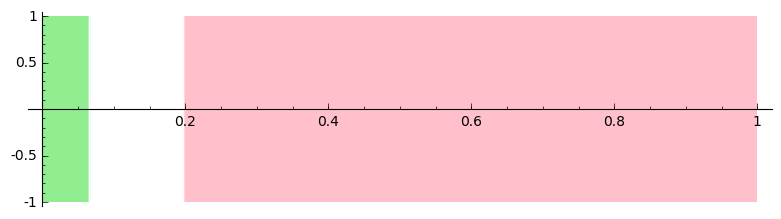

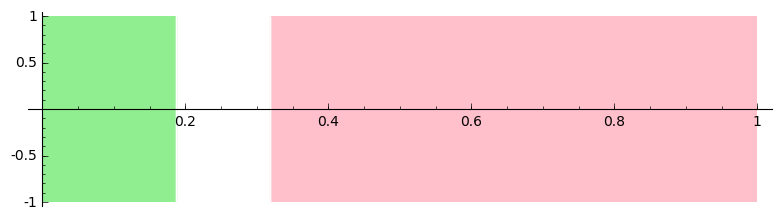

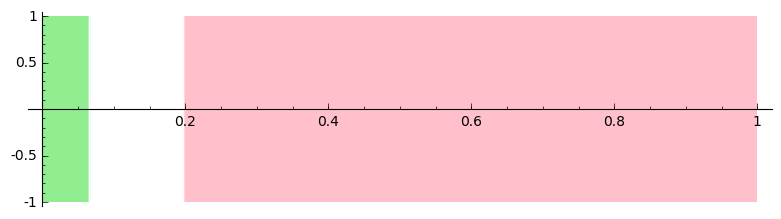

In [171]:
csig1.plot(aspect_ratio=ar).show()
csig2.plot(aspect_ratio=ar).show()
csig.plot(aspect_ratio=ar).show()

In [172]:
step = 0.005
csig = reduce(Signal.__and__,
              (C(RIF(0,1),
                 (lambda x: x + RIF(0.4 + step*k, 0.4 + step*(k+1))),
                 (lambda f: to_signal((lambda t: f(t) - 1.2),
                                      f.derivative(),
                                      RIF(0,10)).F(RIF(0.1,0.2))(0)),
                 y, g, 0.01)
               for k in range(round(0.2/step))))

I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943821400406 .. 1.4050000046566129]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.15876024774620956]
b = -1.?
t = [0.00000000000000000 .. 0.15786861754804122]
b = -1.?
t = [0.00000000000000000 .. 0.15773806547957062]
b = -1.?
t = [0.00000000000000000 .. 0.15771900829977798]
b = -1.?
found upper bound!
t = [0.15871622705904353 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.15871622705904353 .. 10.000000000000000], fprime(t) = [-1.1988000543788076 .. -0.000034860335290431976]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306561067699 .. 1.4050000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.15876024774620956]
b = -1.?
t = [0.00000000000000000 .. 0.1578686162

I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0065306579694150 .. 1.1838007836788894]
h  = t |--> e^(-t + 0.1?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1838008044287563 .. -0.000045695342123508453]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.76787943867966534 .. 1.0115306612290443]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0115306740626693 .. -0.000034860335290431976]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.77287943821400406 .. 1.4100000046566131]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.16215232872590835]
b = -1.?
t = [0.00000000000000000 .. 0.16140017161490334]
b = -1.?
t = [0.00000000000000000

t = [0.00000000000000000 .. 0.074257887713467738]
b = -2.?
found upper bound!
t = [0.075254627320061662 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.075254627320061662 .. 10.000000000000000], fprime(t) = [-1.1988003207370639 .. -0.000053741969168186187]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0115306579694152 .. 1.1888007836788895]
h  = t |--> e^(-t + 0.1?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1888008108362556 .. -0.000045920722186565399]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.77287943867966535 .. 1.0165306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0165306786075235 .. -0.000035087577998638153]
returning

t = [0.00000000000000000 .. 0.078116922227117234]
b = -2.?
found upper bound!
t = [0.079115509053893459 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.079115509053893459 .. 10.000000000000000], fprime(t) = [-1.1988004734739662 .. -0.000053969211876392364]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0165306579694151 .. 1.1938007836788894]
h  = t |--> e^(-t + 0.1?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.1938008004799486 .. -0.000046147964894771575]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.77787943867966535 .. 1.0215306612290443]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0215306757017971 .. -0.000035312958061695098]
returning

returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.78787943821400407 .. 1.4250000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.17274316591543896]
b = -1.?
t = [0.00000000000000000 .. 0.17199158285023034]
b = -1.?
t = [0.00000000000000000 .. 0.17187258544549700]
b = -1.?
t = [0.00000000000000000 .. 0.17185378723862330]
b = -1.?
found upper bound!
t = [0.17285081824762463 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.17285081824762463 .. 10.000000000000000], fprime(t) = [-1.1987999463453889 .. -0.000035767443478107452]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0265306561067699 .. 1.4250000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.17274316591543896]
b = -1.?
t = [0.00000000000

b = -2.?
found upper bound!
t = [0.086793480356965060 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.086793480356965060 .. 10.000000000000000], fprime(t) = [-1.1988000357523561 .. -0.000054423697292804718]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0265306579694151 .. 1.2038007836788894]
h  = t |--> e^(-t + 0.1?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.0032129096689825000]
b = -2.?
t = [0.00000000000000000 .. 0.0031624762402643909]
b = -2.?
found upper bound!
t = [0.0041623162490840581 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.0041623162490840581 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000046602450311183929]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.78787943867966536 .. 1.0315306612290443]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0

t = [0.00000000000000000 .. 0.0074580981920691079]
b = -2.?
t = [0.00000000000000000 .. 0.0073083340997454911]
b = -2.?
found upper bound!
t = [0.0083072332784101567 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.0083072332784101567 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000046829693019390106]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.79287943867966537 .. 1.0365306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0365306762978435 .. -0.000035994686186313629]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.79787943821400408 .. 1.4350000046566130]
h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.18016327125170101]
b = -1.?
t = [0.00000000000000000 .. 0.17906018891706039]
b = -1.?
t = [0.00000

I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0365306579694151 .. 1.2138007836788894]
h  = t |--> e^(-t + 0.1?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.011515219505700262]
b = -2.?
t = [0.00000000000000000 .. 0.011435939130654102]
b = -2.?
found upper bound!
t = [0.012435034663409392 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.012435034663409392 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000047056935727596282]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.79787943867966537 .. 1.0415306612290443]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0415306864306331 .. -0.000036221928894519805]
returning res = False
I  = [0.00000000000000000 .. 1.0000000000000000]
C || f(I) = [0.80287943821400409 .. 1.4400000046566131]
h  = t |--> e^(-t + 0.?)
0

h  = t |--> e^(-t + 0.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.18592540853389872]
b = -1.?
t = [0.00000000000000000 .. 0.18581111443688126]
b = -1.?
t = [0.00000000000000000 .. 0.18579172887704290]
b = -1.?
found upper bound!
t = [0.18678844134059788 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.18678844134059788 .. 10.000000000000000], fprime(t) = [-1.1987998122349382 .. -0.000036676414310932159]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0465306561067699 .. 1.4450000027939678]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.18592540853389872]
b = -1.?
t = [0.00000000000000000 .. 0.18581111314770616]
b = -1.?
t = [0.00000000000000000 .. 0.18579172758783031]
b = -1.?
found upper bound!
t = [0.18678843940686715 .. 10.000000000000000]
b = -1.?
stopping si

bisecting [0.12500000000000000 .. 0.18750000000000000] -> [0.12500000000000000 .. 0.15625000000000000], [0.15625000000000000 .. 0.18750000000000000]
I  = [0.12500000000000000 .. 0.15625000000000000]
C || f(I) = [1.2953453255444764 .. 1.3274969036504627]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.071823384850234650 .. 10.000000000000000]
b = -1.?
t = [0.076333112556928608 .. 10.000000000000000]
b = -1.?
t = [0.076452783296519832 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.076455689219272301 .. 0.10198227742612146]
b = -1.2?
t = [0.076455689219272301 .. 0.10099851171250586]
b = -1.2?
t = [0.076455689219272301 .. 0.10097418949521731]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.076455689219272302]
f(I) = [8.4936618849340561e-8 .. 0.12749690487980848]
t = [0.10197360122059503 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10197360122059503 .. 10.000000000000000], fprime(t) = [-1.19880059

t = [0.10097286392788243 .. 0.18924461965979237]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.10097286392788244]
f(I) = [8.5979700092941868e-7 .. 0.25000000298023229]
t = [0.19024222317502062 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.19024222317502062 .. 10.000000000000000], fprime(t) = [-1.1988003486767412 .. -0.000060266815125942230]
returning res = True
I  = [0.12500000000000000 .. 0.25000000000000000]
C || f(I) = [1.2238007808849213 .. 1.3324969036504629]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.017861788574944609 .. 10.000000000000000]
b = -1.?
t = [0.019493357113838590 .. 10.000000000000000]
b = -1.?
t = [0.019627890758054392 .. 10.000000000000000]
b = -1.?
t = [0.019638875621319558 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.019639770318150603 .. 0.10585186836893841]
b = -2.?
t = [0.019639770318150603 .. 0.10482484300006036]
b = -2.?
t = [0.019639770318150603 .. 0.104740

stopping since presumed converged
t = [0.064779754586419102 .. 10.000000000000000], fprime(t) = [-1.1988005982711912 .. -0.000055558048188686370]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0515306579694150 .. 1.2288007836788895]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.024003919178661186]
b = -2.?
t = [0.00000000000000000 .. 0.023723926259739917]
b = -2.?
found upper bound!
t = [0.024717324241916287 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.024717324241916287 .. 10.000000000000000], fprime(t) = [-1.1988004287704826 .. -0.000047736801207065582]
returning res = False
I  = [0.50000000000000000 .. 1.0000000000000000]
C || f(I) = [0.81287943867966527 .. 1.0565306612290444]
h  = t |--> e^(-t + 0.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.00000000000000000 .. 10.000000000000000], fprime(t) = [-1.0565306814387441 .. -0.000036903

b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.094412070132489562]
f(I) = [2.1606683775488022e-8 .. 0.13749690465629106]
t = [0.10947839820443543 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10947839820443543 .. 10.000000000000000], fprime(t) = [-1.1988005368039012 .. -0.000059871934354305267]
bisecting [0.12500000000000000 .. 0.14062500000000000] -> [0.12500000000000000 .. 0.13281250000000000], [0.13281250000000000 .. 0.14062500000000000]
I  = [0.12500000000000000 .. 0.13281250000000000]
C || f(I) = [1.3256292555481195 .. 1.3374969036504627]
h  = t |--> e^(-t + 0.29?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.093928629155036566 .. 10.000000000000000]
b = -1.?
t = [0.099499961458817870 .. 10.000000000000000]
b = -1.?
t = [0.099565112211907350 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.099565691584877810 .. 0.10864394383946291]
b = -1.2?
t = [0.099565691584877810 .. 0.10847981257999912]
b = -1.2?
found upper

t = [0.10836904085380859 .. 10.000000000000000]
b = -1.?
t = [0.10846914845356120 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.10847755304070572 .. 0.19683927545407052]
b = -2.?
t = [0.10847755304070572 .. 0.19617590328266982]
b = -2.?
t = [0.10847755304070572 .. 0.19612000248186335]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.10847755304070573]
f(I) = [9.2312693600327122e-7 .. 0.26000000275671487]
t = [0.19711531085524733 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.19711531085524733 .. 10.000000000000000], fprime(t) = [-1.1988001065328718 .. -0.000060721300542354583]
returning res = True
I  = [0.12500000000000000 .. 0.25000000000000000]
C || f(I) = [1.2338007808849213 .. 1.3424969036504629]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.025177544637631853 .. 10.000000000000000]
b = -1.?
t = [0.027564266498567895 .. 10.000000000000000]
b = -1.?
t = [0.027760592834991000 .. 10.000000000

t = [0.026221888312294629 .. 10.000000000000000]
b = -1.?
t = [0.027710085603442707 .. 10.000000000000000]
b = -1.?
t = [0.027775002733671463 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.027777786333484953 .. 0.072092533905841042]
b = -1.2?
t = [0.027777786333484953 .. 0.071590374124369500]
b = -1.2?
t = [0.027777786333484953 .. 0.071568726880413103]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.027777786333484954]
f(I) = [1.5012919907242405e-7 .. 0.089029119536280677]
t = [0.072567799209304159 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.072567799209304159 .. 10.000000000000000], fprime(t) = [-1.1988005721941591 .. -0.000056012533605098724]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0615306579694150 .. 1.2388007836788895]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.031906155936007951]
b = -2.?
t = [0.00000000000000000 .. 0.031824877418510443]
b = -2.?
fo

t = [0.031818819948084962 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.031822094392128706 .. 0.075613980660712469]
b = -1.2?
t = [0.031822094392128706 .. 0.075446619703679663]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.031822094392128707]
f(I) = [1.7434358601242649e-7 .. 0.094029120355844543]
t = [0.076439461254528245 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.076439461254528245 .. 10.000000000000000], fprime(t) = [-1.1988002406433225 .. -0.000056239776313304901]
returning res = False
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0665306579694151 .. 1.2438007836788894]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.036290467037846386]
b = -2.?
t = [0.00000000000000000 .. 0.035865878557194510]
b = -2.?
t = [0.00000000000000000 .. 0.035850833641282769]
b = -2.?
found upper bound!
t = [0.036850302912046550 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.03

h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.089889427510770905 .. 10.000000000000000]
b = -1.?
t = [0.095477471261023350 .. 10.000000000000000]
b = -1.?
t = [0.095570448232582497 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.095571735013574840 .. 0.11015048222263315]
b = -1.2?
t = [0.095571735013574840 .. 0.10947309294985626]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.095571735013574841]
f(I) = [2.1606683775488022e-8 .. 0.13881505951285367]
t = [0.11046351571094069 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11046351571094069 .. 10.000000000000000], fprime(t) = [-1.1988004641607404 .. -0.000059940852224826812]
bisecting [0.14062500000000000 .. 0.15625000000000000] -> [0.14062500000000000 .. 0.14843750000000000], [0.14843750000000000 .. 0.15625000000000000]
I  = [0.14062500000000000 .. 0.14843750000000000]
C || f(I) = [1.3270538823306559 .. 1.3388150569796565]
h  = t |--> e^(-t + 0.

b = -1.?
t = [0.089216662470117474 .. 10.000000000000000]
b = -1.?
t = [0.094258930788708589 .. 10.000000000000000]
b = -1.?
t = [0.094315976787732069 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.094316479295544958 .. 0.10408939710382042]
b = -1.2?
t = [0.094316479295544958 .. 0.10312598727223893]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.094316479295544959]
f(I) = [4.8428774324094092e-9 .. 0.13034533075988298]
t = [0.10411707660091583 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10411707660091583 .. 10.000000000000000], fprime(t) = [-1.1988005274906755 .. -0.000059866346418857574]
returning res = None
I  = [0.16406250000000000 .. 0.17187500000000000]
C || f(I) = [1.3120844255015253 .. 1.3236889777705075]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.084675797602079785 .. 10.000000000000000]
b = -1.?
t = [0.089244417081922405 .. 10.000000000000000]
b = -1.?
t = [0.08929502908618239

t = [0.00000000000000000 .. 0.21521120482776260]
b = -1.?
t = [0.00000000000000000 .. 0.21350151496449380]
b = -1.?
t = [0.00000000000000000 .. 0.21317164816135729]
b = -1.?
t = [0.00000000000000000 .. 0.21310827570562547]
b = -1.?
t = [0.00000000000000000 .. 0.21309611031239778]
b = -1.?
found upper bound!
t = [0.21409377554629360 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.21409377554629360 .. 10.000000000000000], fprime(t) = [-1.1987999463453889 .. -0.000038492493331432342]
bisecting [0.00000000000000000 .. 1.0000000000000000] -> [0.00000000000000000 .. 0.50000000000000000], [0.50000000000000000 .. 1.0000000000000000]
I  = [0.00000000000000000 .. 0.50000000000000000]
C || f(I) = [1.0865306561067700 .. 1.4850000027939679]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.21521120482776260]
b = -1.?
t = [0.00000000000000000 .. 0.21350151245266411]
b = -1.?
t = [0.00000000000000000 .. 0.21317164627647398]
b = -1.?
t = [0.0000000000

h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.21746331687604021]
b = -1.?
t = [0.00000000000000000 .. 0.21665131122803763]
b = -1.?
t = [0.00000000000000000 .. 0.21649287463226206]
b = -1.?
t = [0.00000000000000000 .. 0.21646202297822409]
b = -1.?
found upper bound!
t = [0.21745601763527280 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.21745601763527280 .. 10.000000000000000], fprime(t) = [-1.1987988753244281 .. -0.000049552880227565765]
bisecting [0.00000000000000000 .. 0.50000000000000000] -> [0.00000000000000000 .. 0.25000000000000000], [0.25000000000000000 .. 0.50000000000000000]
I  = [0.00000000000000000 .. 0.25000000000000000]
C || f(I) = [1.2638007790222762 .. 1.4900000027939678]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.042819311722290101 .. 10.000000000000000]
b = -1.?
t = [0.050404301106966670 .. 10.000000000000000]
b = -1.?
t = [0.051589080028815507 .. 10.000000000000000]

b = -1.?
t = [0.090483202475717963 .. 10.000000000000000]
b = -1.?
t = [0.095653689219660456 .. 10.000000000000000]
b = -1.?
t = [0.095712061961273436 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.095712570669119645 .. 0.10447156601823836]
b = -1.2?
t = [0.095712570669119645 .. 0.10442381669896095]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.095712570669119646]
f(I) = [4.8428774324094092e-9 .. 0.13208442851901059]
t = [0.10542340216185942 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10542340216185942 .. 10.000000000000000], fprime(t) = [-1.1988006168976427 .. -0.000059950165450572967]
returning res = None
I  = [0.17968750000000000 .. 0.18750000000000000]
C || f(I) = [1.3140291167795656 .. 1.3255312747880817]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.086025214242010025 .. 10.000000000000000]
b = -1.?
t = [0.090724118799670142 .. 10.000000000000000]
b = -1.?
t = [0.09077606316168483

t = [0.10425676176587825 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10425676176587825 .. 10.000000000000000], fprime(t) = [-1.1988006243482233 .. -0.000059881247580051422]
returning res = None
I  = [0.18750000000000000 .. 0.25000000000000000]
C || f(I) = [1.2688007808849215 .. 1.3240291186422111]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.051963188597514503 .. 10.000000000000000]
b = -1.?
t = [0.055585780146399275 .. 10.000000000000000]
b = -1.?
t = [0.055743739421124510 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.055750340120193100 .. 0.099216452675314357]
b = -1.2?
t = [0.055750340120193100 .. 0.098394060460563815]
b = -1.2?
t = [0.055750340120193100 .. 0.098359403586236488]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.055750340120193101]
f(I) = [3.4570693974167454e-7 .. 0.12402911968529229]
t = [0.099357957182269224 .. 10.000000000000000]
b = -1.?
stopping since presumed conve

t = [0.088603031635083012 .. 0.10212837753297612]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.088603031635083013]
f(I) = [1.7881393477026108e-8 .. 0.12902912050485616]
t = [0.10312715030633412 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10312715030633412 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000059525482356548309]
bisecting [0.18750000000000000 .. 0.20312500000000000] -> [0.18750000000000000 .. 0.19531250000000000], [0.19531250000000000 .. 0.20312500000000000]
I  = [0.18750000000000000 .. 0.19531250000000000]
C || f(I) = [1.3175775603204964 .. 1.3290291186422110]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.088468756678514753 .. 10.000000000000000]
b = -1.?
t = [0.093417793208933577 .. 10.000000000000000]
b = -1.?
t = [0.093472830399194406 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.093473305281817312 .. 0.10316723010269636]
b = -1.2?
t = [0.09347330528181

b = -1.2?
t = [0.082748643288170345 .. 0.10589888933569171]
b = -1.2?
t = [0.082748643288170345 .. 0.10588260079737472]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.082748643288170346]
f(I) = [8.1211328550878647e-8 .. 0.13402911946177488]
t = [0.10688222859713052 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10688222859713052 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000059177167713642120]
bisecting [0.18750000000000000 .. 0.21875000000000000] -> [0.18750000000000000 .. 0.20312500000000000], [0.20312500000000000 .. 0.21875000000000000]
I  = [0.18750000000000000 .. 0.20312500000000000]
C || f(I) = [1.3161762114614248 .. 1.3340291186422111]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.087086709109897839 .. 10.000000000000000]
b = -1.?
t = [0.092323984652157686 .. 10.000000000000000]
b = -1.?
t = [0.092408020315294714 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.0924

t = [0.10103377499785251 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.10103433455233877 .. 0.11023427372495154]
b = -1.2?
t = [0.10103433455233877 .. 0.10962866737080846]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.10103433455233878]
f(I) = [4.8428774324094092e-9 .. 0.13902912028133874]
t = [0.11062330358552166 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11062330358552166 .. 10.000000000000000], fprime(t) = [-1.1988005628809333 .. -0.000060270540416240692]
returning res = True
I  = [0.19531250000000000 .. 0.20312500000000000]
C || f(I) = [1.3211762114614247 .. 1.3325775631144643]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.090933698770722659 .. 10.000000000000000]
b = -1.?
t = [0.096142056132653058 .. 10.000000000000000]
b = -1.?
t = [0.096200344985053490 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.096200844519473513 .. 0.10500029663127690]
b = -1.2?
t = [0.096200844

t = [0.10474145787216181 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10474145787216181 .. 10.000000000000000], fprime(t) = [-1.1988005088642240 .. -0.000059631653130054473]
bisecting [0.20312500000000000 .. 0.21875000000000000] -> [0.20312500000000000 .. 0.21093750000000000], [0.21093750000000000 .. 0.21875000000000000]
I  = [0.20312500000000000 .. 0.21093750000000000]
C || f(I) = [1.3198246771842241 .. 1.3311762133240702]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.090014132925393924 .. 10.000000000000000]
b = -1.?
t = [0.095120126487723610 .. 10.000000000000000]
b = -1.?
t = [0.095176858217151077 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.095177343915187992 .. 0.10389199213871195]
b = -1.2?
t = [0.095177343915187992 .. 0.10374266238625746]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.095177343915187993]
f(I) = [4.8428774324094092e-9 .. 0.13117621578276162]
t = [0.10474137673244

t = [0.075252390002936916 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.075262248688571883 .. 0.11821330861575962]
b = -1.2?
t = [0.075262248688571883 .. 0.11711130848863427]
b = -1.2?
t = [0.075262248688571883 .. 0.11706555996053173]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.075262248688571884]
f(I) = [5.0403177742630589e-7 .. 0.14902912005782132]
t = [0.11806368663397442 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11806368663397442 .. 10.000000000000000], fprime(t) = [-1.1988005274906755 .. -0.000058735720813274383]
bisecting [0.18750000000000000 .. 0.25000000000000000] -> [0.18750000000000000 .. 0.21875000000000000], [0.21875000000000000 .. 0.25000000000000000]
I  = [0.18750000000000000 .. 0.21875000000000000]
C || f(I) = [1.3185225719213484 .. 1.3490291186422110]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.087857678157818933 .. 10.000000000000000]
b = -1.?
t = [0.0940275274269

t = [0.11653944004532637 .. 10.000000000000000]
b = -1.?
t = [0.11704169550589003 .. 10.000000000000000]
b = -1.?
t = [0.11706269071805827 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.11706356341691973 .. 0.15956681795032510]
b = -1.2?
t = [0.11706356341691973 .. 0.15949446332496842]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.11706356341691974]
f(I) = [4.5821070715490463e-8 .. 0.20749690681695943]
t = [0.16049145603712908 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.16049145603712908 .. 10.000000000000000], fprime(t) = [-1.1988004548475147 .. -0.000061244703829288482]
returning res = True
I  = [0.18750000000000000 .. 0.25000000000000000]
C || f(I) = [1.2988007808849215 .. 1.3540291186422111]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.072967984730495788 .. 10.000000000000000]
b = -1.?
t = [0.078850768364945381 .. 10.000000000000000]
b = -1.?
t = [0.079108794918760952 .. 10.00000000

t = [0.00000000000000000 .. 0.24295450048136616]
b = -1.?
found upper bound!
t = [0.24394797647544982 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.24394797647544982 .. 10.000000000000000], fprime(t) = [-1.1987984729930759 .. -0.000051368959248065948]
bisecting [0.00000000000000000 .. 0.50000000000000000] -> [0.00000000000000000 .. 0.25000000000000000], [0.25000000000000000 .. 0.50000000000000000]
I  = [0.00000000000000000 .. 0.25000000000000000]
C || f(I) = [1.3038007790222763 .. 1.5300000027939678]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.067843642617044050 .. 10.000000000000000]
b = -1.?
t = [0.080630060285183602 .. 10.000000000000000]
b = -1.?
t = [0.082615021871433561 .. 10.000000000000000]
b = -1.?
t = [0.082910748167849795 .. 10.000000000000000]
b = -1.?
t = [0.082954519562193296 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.082960992386848314 .. 0.24395659958274008]
b = -2.?
t = [0.0829609923

b = -1.?
t = [0.086781811169236958 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.086788556312097045 .. 0.24663662939192316]
b = -2.?
t = [0.086788556312097045 .. 0.24627194717889731]
b = -2.?
t = [0.086788556312097045 .. 0.24621813045897548]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.086788556312097046]
f(I) = [1.3999640942063962e-6 .. 0.33500000573694711]
t = [0.24721019838420607 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.24721019838420607 .. 10.000000000000000], fprime(t) = [-1.1987989814952016 .. -0.000059417448937892913]
bisecting [0.00000000000000000 .. 0.25000000000000000] -> [0.00000000000000000 .. 0.12500000000000000], [0.12500000000000000 .. 0.25000000000000000]
I  = [0.00000000000000000 .. 0.12500000000000000]
C || f(I) = [1.4124969008564949 .. 1.5350000018626453]
h  = t |--> e^(-t + 0.4?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.13843445933517312 .. 10.000000000000000]
b = -1.?
t = [0.16079772

C || f(I) = [1.3640291167795657 .. 1.4224969036504627]
h  = t |--> e^(-t + 0.4?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.11531069730198989 .. 10.000000000000000]
b = -1.?
t = [0.12751645105530090 .. 10.000000000000000]
b = -1.?
t = [0.12809630823343032 .. 10.000000000000000]
b = -1.?
t = [0.12812031650143931 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.12812130420611983 .. 0.17069151641955527]
b = -1.2?
t = [0.12812130420611983 .. 0.17011696165888371]
b = -1.2?
t = [0.12812130420611983 .. 0.17009317486043427]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.12812130420611984]
f(I) = [4.9546361013952378e-8 .. 0.22249690555036073]
t = [0.17109219638287284 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.17109219638287284 .. 10.000000000000000], fprime(t) = [-1.1988005721941591 .. -0.000061924569308757781]
returning res = True
I  = [0.18750000000000000 .. 0.25000000000000000]
C || f(I) = [1.3138007808849214 .. 1.369

b = -1.?
t = [0.094003851778288988 .. 10.000000000000000]
b = -1.?
t = [0.094343012352437735 .. 10.000000000000000]
b = -1.?
t = [0.094392732985355262 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.094400014320004957 .. 0.25338335170983778]
b = -2.?
t = [0.094400014320004957 .. 0.25280225785229488]
b = -2.?
t = [0.094400014320004957 .. 0.25271698760226114]
b = -2.?
t = [0.094400014320004957 .. 0.25270449810633811]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.094400014320004958]
f(I) = [1.4986842871156369e-6 .. 0.34500000365078454]
t = [0.25370267047217492 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.25370267047217492 .. 10.000000000000000], fprime(t) = [-1.1988002406433225 .. -0.000059871934354305267]
bisecting [0.00000000000000000 .. 0.25000000000000000] -> [0.00000000000000000 .. 0.12500000000000000], [0.12500000000000000 .. 0.25000000000000000]
I  = [0.00000000000000000 .. 0.12500000000000000]
C || f(I) = [1.4224969008564949 .. 

b = -1.?
found lower bound!
t = [0.098184127402678150 .. 0.25755222112889382]
b = -2.?
t = [0.098184127402678150 .. 0.25617074364012988]
b = -2.?
t = [0.098184127402678150 .. 0.25596804108002758]
b = -2.?
t = [0.098184127402678150 .. 0.25593843675241724]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.098184127402678151]
f(I) = [1.5471130609956418e-6 .. 0.35000000447034841]
t = [0.25693411582558722 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.25693411582558722 .. 10.000000000000000], fprime(t) = [-1.1987997321411968 .. -0.000060099177062511444]
bisecting [0.00000000000000000 .. 0.25000000000000000] -> [0.00000000000000000 .. 0.12500000000000000], [0.12500000000000000 .. 0.25000000000000000]
I  = [0.00000000000000000 .. 0.12500000000000000]
C || f(I) = [1.4274969008564948 .. 1.5500000018626452]
h  = t |--> e^(-t + 0.4?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.14677218937421851 .. 10.000000000000000]
b = -1.?
t = [0.1711520

t = [0.093596664034139964 .. 0.10218034233006767]
b = -1.2?
t = [0.093596664034139964 .. 0.10195721171887138]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.093596664034139965]
f(I) = [4.8428774324094092e-9 .. 0.12880078442394738]
t = [0.10295532855878619 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.10295532855878619 .. 10.000000000000000], fprime(t) = [-1.1988005982711912 .. -0.000059823505580425262]
returning res = None
I  = [0.25781250000000000 .. 0.26562500000000000]
C || f(I) = [1.3117265944182872 .. 1.3227401079609991]
h  = t |--> e^(-t + 0.28?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.084466017643589616 .. 10.000000000000000]
b = -1.?
t = [0.088974501137456807 .. 10.000000000000000]
b = -1.?
t = [0.089022317493576808 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.089022717090543893 .. 0.098299687343117656]
b = -1.2?
t = [0.089022717090543893 .. 0.097391910093516554]
b = -1.2?
found upper bound!
  I  = [

stopping since presumed converged
t = [0.10671137245583024 .. 10.000000000000000], fprime(t) = [-1.1988002238795162 .. -0.000056170858442783355]
bisecting [0.25000000000000000 .. 0.37500000000000000] -> [0.25000000000000000 .. 0.31250000000000000], [0.31250000000000000 .. 0.37500000000000000]
I  = [0.25000000000000000 .. 0.31250000000000000]
C || f(I) = [1.2816156271845102 .. 1.3338007836788895]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.061190264540634829 .. 10.000000000000000]
b = -1.?
t = [0.065609384292839065 .. 10.000000000000000]
b = -1.?
t = [0.065792458568279726 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.065799639365548778 .. 0.10627496354809886]
b = -1.2?
t = [0.065799639365548778 .. 0.10573325973149650]
b = -1.2?
t = [0.065799639365548778 .. 0.10571191316440923]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.065799639365548779]
f(I) = [3.5129487518936741e-7 .. 0.13380078524351125]
t = [0.106711077342

b = -2.?
t = [0.00000000000000000 .. 0.10946209687465592]
b = -2.?
found upper bound!
t = [0.11045369160292194 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.11045369160292194 .. 10.000000000000000], fprime(t) = [-1.1987994546070695 .. -0.000052732415497303009]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [0.37500000000000000 .. 0.50000000000000000]
I  = [0.25000000000000000 .. 0.37500000000000000]
C || f(I) = [1.2422892770916222 .. 1.3388007836788894]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.031587427088044787 .. 10.000000000000000]
b = -1.?
t = [0.034410363089567824 .. 10.000000000000000]
b = -1.?
t = [0.034618142472579285 .. 10.000000000000000]
b = -1.?
t = [0.034633143911615503 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.034634225006225378 .. 0.10953194956668183]
b = -1.2?
t = [0.034634225006225378 .. 0.10945843418807900]
b = -1.2?
foun

bisecting [0.00000000000000000 .. 0.50000000000000000] -> [0.00000000000000000 .. 0.25000000000000000], [0.25000000000000000 .. 0.50000000000000000]
I  = [0.00000000000000000 .. 0.25000000000000000]
C || f(I) = [1.3388007790222764 .. 1.5650000027939679]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.088690589270079792 .. 10.000000000000000]
b = -1.?
t = [0.10626872108968779 .. 10.000000000000000]
b = -1.?
t = [0.10898817819829756 .. 10.000000000000000]
b = -1.?
t = [0.10938547833570259 .. 10.000000000000000]
b = -1.?
t = [0.10944299261046828 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.10945130702324878 .. 0.26829645718303203]
b = -2.?
t = [0.10945130702324878 .. 0.26596236392184636]
b = -2.?
t = [0.10945130702324878 .. 0.26562187674479654]
b = -2.?
t = [0.10945130702324878 .. 0.26557259827435964]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.10945130702324879]
f(I) = [1.6868114471879636e-6 .. 0.36500000506639486]
t 

stopping since presumed converged
t = [0.11789545148557241 .. 10.000000000000000], fprime(t) = [-1.1987992757931352 .. -0.000053185038268566131]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [0.37500000000000000 .. 0.50000000000000000]
I  = [0.25000000000000000 .. 0.37500000000000000]
C || f(I) = [1.2522892770916222 .. 1.3488007836788894]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.038767232927972301 .. 10.000000000000000]
b = -1.?
t = [0.042366792436246497 .. 10.000000000000000]
b = -1.?
t = [0.042631312388148087 .. 10.000000000000000]
b = -1.?
t = [0.042650276807096668 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.042651633781130321 .. 0.11764803054465311]
b = -1.2?
t = [0.042651633781130321 .. 0.11694852733819951]
b = -1.2?
t = [0.042651633781130321 .. 0.11689821229742305]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.042651633781130322]
f(I) = [1.25914

stopping since presumed converged
t = [0.27293463444918286 .. 10.000000000000000], fprime(t) = [-1.1987995272502304 .. -0.000053412280976772308]
bisecting [0.00000000000000000 .. 0.50000000000000000] -> [0.00000000000000000 .. 0.25000000000000000], [0.25000000000000000 .. 0.50000000000000000]
I  = [0.00000000000000000 .. 0.25000000000000000]
C || f(I) = [1.3488007790222764 .. 1.5750000027939680]
h  = t |--> e^(-t + 1.?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.094476680415548006 .. 10.000000000000000]
b = -1.?
t = [0.11346114719709274 .. 10.000000000000000]
b = -1.?
t = [0.11639621642727129 .. 10.000000000000000]
b = -1.?
t = [0.11682268201303903 .. 10.000000000000000]
b = -1.?
t = [0.11688403527156084 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.11689284776846786 .. 0.27409815966748885]
b = -2.?
t = [0.11689284776846786 .. 0.27224657998017638]
b = -2.?
t = [0.11689284776846786 .. 0.27197869291636257]
b = -2.?
t = [0.11689284776846786 .. 0.2719401779

C || f(I) = [1.3538007790222763 .. 1.5800000027939678]
h  = t |--> e^(-t + 0.4?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.097342261180778280 .. 10.000000000000000]
b = -1.?
t = [0.11703574182840263 .. 10.000000000000000]
b = -1.?
t = [0.12007956742170361 .. 10.000000000000000]
b = -1.?
t = [0.12052063918012537 .. 10.000000000000000]
b = -1.?
t = [0.12058389601490943 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.12059295524074009 .. 0.27662117934704389]
b = -2.?
t = [0.12059295524074009 .. 0.27532158784794459]
b = -2.?
t = [0.12059295524074009 .. 0.27513456519159347]
b = -2.?
t = [0.12059295524074009 .. 0.27510777083427474]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.12059295524074010]
f(I) = [1.8153339624848996e-6 .. 0.38000000566244130]
t = [0.27610393463305521 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.27610393463305521 .. 10.000000000000000], fprime(t) = [-1.1987998569384218 .. -0.000061460770666599273

t = [0.12420497081407151 .. 10.000000000000000]
b = -1.?
t = [0.12427012234057233 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.12427942319828752 .. 0.27890512652099598]
b = -2.?
t = [0.12427942319828752 .. 0.27835469147862291]
b = -2.?
t = [0.12427942319828752 .. 0.27827596372677882]
b = -2.?
t = [0.12427942319828752 .. 0.27826472424285509]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.12427942319828753]
f(I) = [1.8563121557679806e-6 .. 0.38500000461936002]
t = [0.27926312023713417 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.27926312023713417 .. 10.000000000000000], fprime(t) = [-1.1988003039732576 .. -0.000061688013374805450]
returning res = True
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1865306579694152 .. 1.3638007836788893]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.12830652785315844]
b = -2.?
t = [0.00000000000000000 .. 0.12799634202760183]
b = -2.?
t = [0.0000000000000

t = [0.12795235011433439 .. 0.28141959580113974]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.12795235011433440]
f(I) = [1.8991529942002927e-6 .. 0.39000000543892389]
t = [0.28241347757789481 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28241347757789481 .. 10.000000000000000], fprime(t) = [-1.1987994024530054 .. -0.000061915256083011627]
returning res = True
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1915306579694151 .. 1.3688007836788894]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.13249735395363691]
b = -2.?
t = [0.00000000000000000 .. 0.13172280481971380]
b = -2.?
t = [0.00000000000000000 .. 0.13162695049907780]
b = -2.?
t = [0.00000000000000000 .. 0.13161512472313031]
b = -2.?
found upper bound!
t = [0.13261366541606436 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13261366541606436 .. 10.000000000000000], fprime(t) = [-1.1988003747537733 .. -0.0000540940091

t = [0.13161183662909048 .. 0.28572035256495232]
b = -2.?
t = [0.13161183662909048 .. 0.28471843666830011]
b = -2.?
t = [0.13161183662909048 .. 0.28457577254592493]
b = -2.?
t = [0.13161183662909048 .. 0.28455552851343380]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.13161183662909049]
f(I) = [1.9382685423341428e-6 .. 0.39500000439584260]
t = [0.28555265736523538 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.28555265736523538 .. 10.000000000000000], fprime(t) = [-1.1988000450655818 .. -0.000062142498791217803]
returning res = True
I  = [0.25000000000000000 .. 0.50000000000000000]
C || f(I) = [1.1965306579694152 .. 1.3738007836788893]
h  = t |--> e^(-t + 1.?)
0 on lower boundary!
t = [0.00000000000000000 .. 0.13536155076810497]
b = -2.?
t = [0.00000000000000000 .. 0.13527253568799453]
b = -2.?
t = [0.00000000000000000 .. 0.13526126952498291]
b = -2.?
found upper bound!
t = [0.13625984400162502 .. 10.000000000000000]
b = -1.?
stopping since pres

b = -1.?
found lower bound!
t = [0.0012743826715479397 .. 0.13984765636157895]
b = -2.?
t = [0.0012743826715479397 .. 0.13901575954152501]
b = -2.?
t = [0.0012743826715479397 .. 0.13890841353082973]
b = -2.?
t = [0.0012743826715479397 .. 0.13889460524589695]
b = -2.?
found upper bound!
  I  = [0.00000000000000000 .. 0.0012743826715479398]
f(I) = [4.2021274571091282e-7 .. 0.17880078516900544]
t = [0.13989283004183505 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.13989283004183505 .. 10.000000000000000], fprime(t) = [-1.1988003039732576 .. -0.000054546631872653961]
bisecting [0.25000000000000000 .. 0.50000000000000000] -> [0.25000000000000000 .. 0.37500000000000000], [0.37500000000000000 .. 0.50000000000000000]
I  = [0.25000000000000000 .. 0.37500000000000000]
C || f(I) = [1.2822892770916223 .. 1.3788007836788894]
h  = t |--> e^(-t + 0.3?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.059681771031475913 .. 10.000000000000000]
b = -1.?
t = [0.0

f(I) = [3.8370490118566635e-8 .. 0.10910618603229528]
t = [0.088023053383325028 .. 10.000000000000000]
b = -1.?
stopping since presumed converged
t = [0.088023053383325028 .. 10.000000000000000], fprime(t) = [-1.1988006075844169 .. -0.000058214180171489715]
returning res = False
I  = [0.37500000000000000 .. 0.50000000000000000]
C || f(I) = [1.2015306579694151 .. 1.2872892798855902]
h  = t |--> e^(-t + 0.2?)
t = [0.00000000000000000 .. 10.000000000000000]
b = -1.?
t = [0.0011890520517431840 .. 10.000000000000000]
b = -1.?
t = [0.0012690211190399759 .. 10.000000000000000]
b = -1.?
found lower bound!
t = [0.0012743520824831813 .. 0.070858113031331785]
b = -1.2?
t = [0.0012743520824831813 .. 0.070260012997096181]
b = -1.2?
t = [0.0012743520824831813 .. 0.070219976372445509]
b = -1.2?
found upper bound!
  I  = [0.00000000000000000 .. 0.0012743520824831814]
f(I) = [4.5746564869553196e-7 .. 0.087289282307028815]
t = [0.071217308558393796 .. 10.000000000000000]
b = -1.?
stopping since presumed

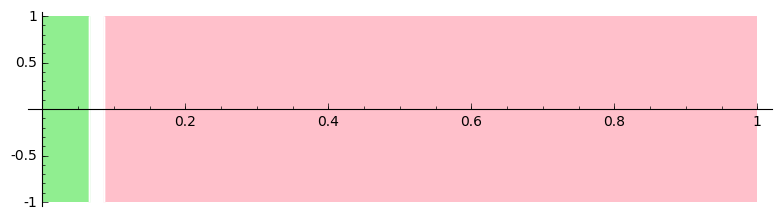

In [173]:
csig.plot(aspect_ratio=ar)

### Nested contexts

In [174]:
def atom(t):
    b = 0.93
    print '===>', RIF(t).str(style='brackets'), RIF(h(t) - b).str(style='brackets')
    return h(t) - b

In [175]:
load('interval_signals.py')

In [176]:
csig = C(RIF(0,5),
         (lambda x: x + 0.5),
         (lambda f: C(RIF(0,10),
                      (lambda x: x + 0.2),
                      (lambda h: to_signal(atom,
                                           h.derivative(),
                                           RIF(0,1)).F(RIF(0.1,0.2))(0)),
                      f,
                      g,
                      0.1).F(RIF(0.1,0.2))(0)),
         y,
         g,
         0.1)
csig

I  = [0.00000000000000000 .. 5.0000000000000000]
C || f(I) = [0.50673794467002153 .. 1.5000000083819032]
h  = t |--> e^(-t + 0.?)
I  = [0.00000000000000000 .. 10.000000000000000]
C || f(I) = [0.20002300459891558 .. 1.7000000288710000]
h  = t |--> e^(-t + 0.?e1)
===> [0.00000000000000000 .. -0.00000000000000000] [0.019235418082440780 .. 0.26866933079506128]
t = [0.00000000000000000 .. 1.0000000000000000]
===> [0.00000000000000000 .. -0.00000000000000000] [0.019235418082440780 .. 0.26866933079506128]
b = -1.?
t = [0.011314951564010831 .. 1.0000000000000000]
===> [0.011314951564010831 .. 0.011314951564010832] [0.024699997994693356 .. 0.27958191100356900]
b = -1.?
t = [0.026009694994190740 .. 1.0000000000000000]
===> [0.026009694994190740 .. 0.026009694994190741] [0.031333261871068773 .. 0.29322469251291151]
b = -1.?
t = [0.044926707187921820 .. 1.0000000000000000]
===> [0.044926707187921820 .. 0.044926707187921821] [0.039103223624247451 .. 0.30990276877567447]
b = -1.?
t = [0.068985567543

===> [0.98745324071893703 .. 0.98745324071893704] [-0.41859288076735391 .. -0.011709302209774175]
t = [0.47242772601256877 .. 0.98745324071893704]
===> [0.98745324071893703 .. 0.98745324071893704] [-0.41859288076735413 .. -0.011709302209774397]
b = -1.?
t = [0.47242772601256877 .. 0.97640597403447005]
===> [0.97640597403447004 .. 0.97640597403447005] [-0.40795221759280565 .. 0.0017776543608468698]
b = -1.?
found upper bound!
===> [0.00000000000000000 .. 0.47242772601256878] [-0.45504581846129167 .. 0.69288705941544804]
  I  = [0.00000000000000000 .. 0.47242772601256878]
f(I) = [-0.45504581846129167 .. 0.69288705941544804]
===> [0.23621386300628438 .. 0.23621386300628439] [0.070189563322540338 .. 0.42193686265336983]
===> [0.97740597403447004 .. 0.97740597403447005] [-0.40891525805306439 .. 0.00056148627673169305]
0 on lower boundary!
===> [0.97740597403447004 .. 0.97740597403447005] [-0.40891525805306462 .. 0.00056148627673169305]
===> [0.97740597403447004 .. 0.97740597403447005] [-0.4

Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 5.0000000000000000], True)])

## Using flow* output

In [178]:
from flowstar.reachability import Poly, Reach

varsd = [b't', b'x', b'y']
qt = Poly(1, 't', 0, varsd)
qx = Poly(-1, 'y', 1, varsd)
qy = Poly(1, 'x', 1, varsd)
print "t' = {}\nx' = {}\ny' = {}".format(qt, qx, qy)

D = Reach(
    varsd,
    [qt, qx, qy],
    [(0,0), (4,5), (1,2)],
    10,
    0.1,
    order=5,
)